In [0]:
import torch

In [0]:
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch.nn.functional as F
import numpy as np
from time import sleep

%matplotlib inline

In [0]:
epochs = 1
lr = 0.001
batch_size = 128
latent_dim = 2

train_data = datasets.FashionMNIST(root='fashiondata/',
                                  train=True,
                                  transform=transforms.ToTensor(),
                                  download=True)

training_samples = torch.utils.data.DataLoader(dataset=train_data, 
                                               batch_size=batch_size, 
                                               shuffle=True)



In [0]:
class Autoencoder(torch.nn.Module):
  def __init__(self):
    super().__init__()
    
    #Encoder
    self.e1 = torch.nn.Linear(784, 256)
    self.e2 = torch.nn.Linear(256, 64)
    self.e3 = torch.nn.Linear(64, latent_dim)
    
    #decoder
    self.d1 = torch.nn.Linear(latent_dim, 64)
    self.d2 = torch.nn.Linear(64, 256)
    self.d3 = torch.nn.Linear(256, 784)
    
  def encoder(self, x):
    x = x.view(-1, 784)
    z = F.relu(self.e1(x))
    z = F.relu(self.e2(z))
    z = self.e3(z)
    
    return z
  
  def decoder(self, z):
    x_pred = F.relu(self.d1(z))
    x_pred = F.relu(self.d2(x_pred))
    x_pred = F.sigmoid(self.d3(x_pred)) #Sigmoid because each value will represent colour and want that between 0 and 1
    
    return x_pred
  
  def forward(self, x):
    z = self.encoder(x)
    x_pred = self.decoder(z)
    
    return x_pred, z

In [0]:
def loss(x_hat, x):
  reconstruction_loss = F.binary_cross_entropy(x_hat, x.view(-1, 784))
  return reconstruction_loss
  

Batch:  0 Cost:  0.6932680010795593


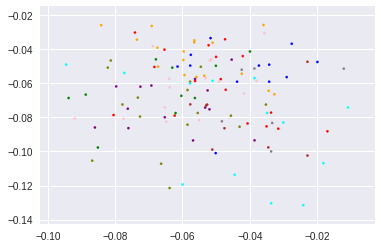

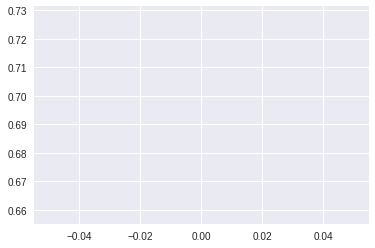

Batch:  1 Cost:  0.6886084675788879


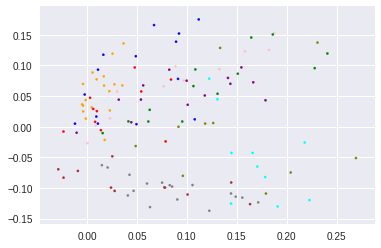

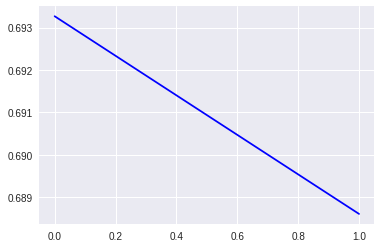

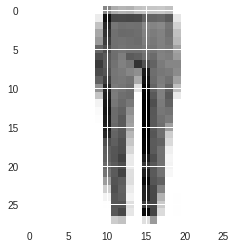

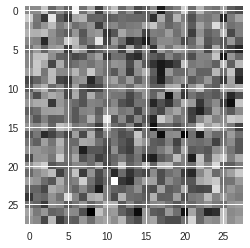

Batch:  2 Cost:  0.6832374334335327


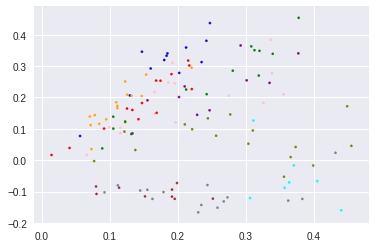

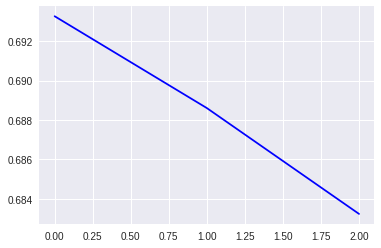

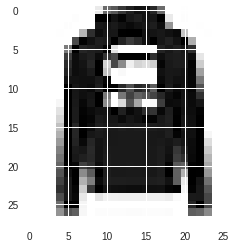

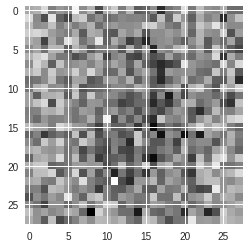

Batch:  3 Cost:  0.6777034401893616


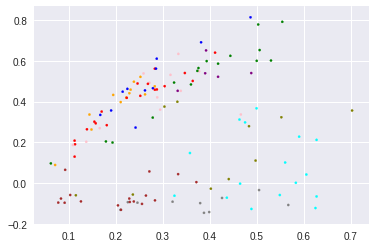

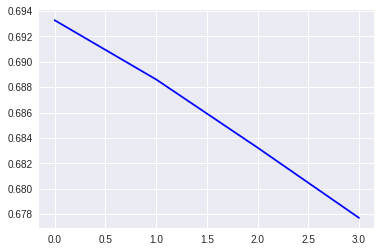

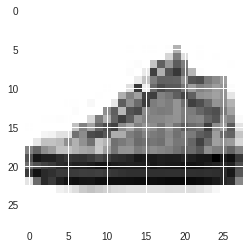

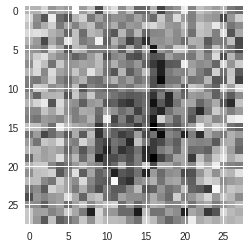

Batch:  4 Cost:  0.6705360412597656


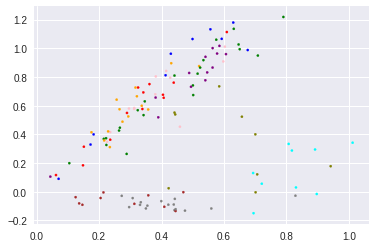

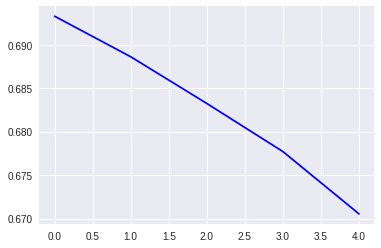

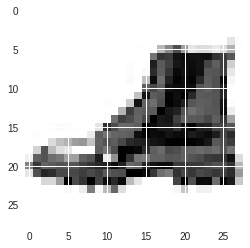

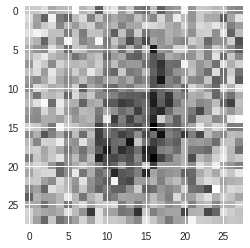

Batch:  5 Cost:  0.6617531776428223


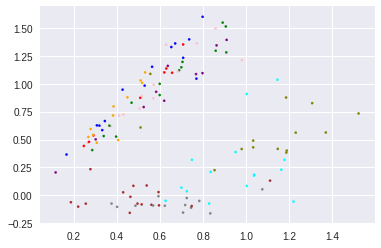

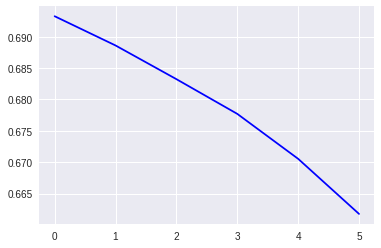

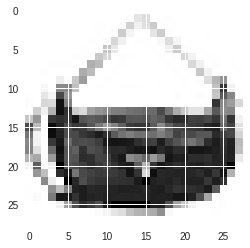

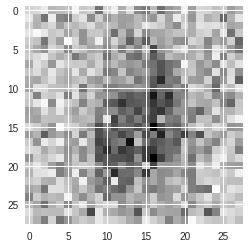

Batch:  6 Cost:  0.6505299210548401


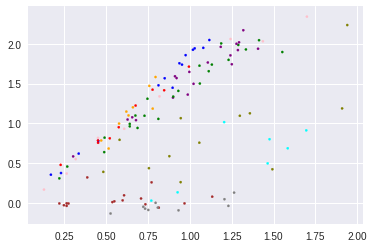

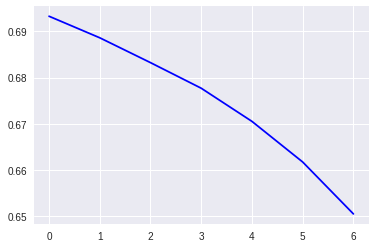

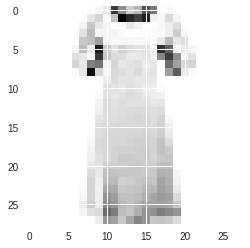

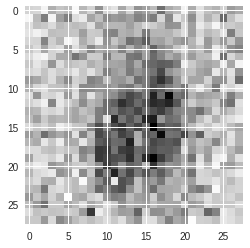

Batch:  7 Cost:  0.6333381533622742


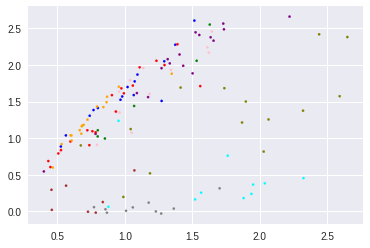

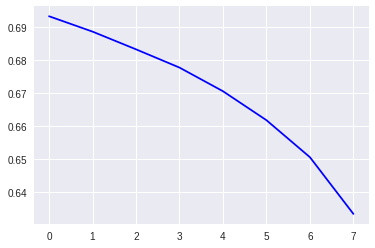

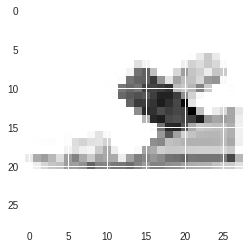

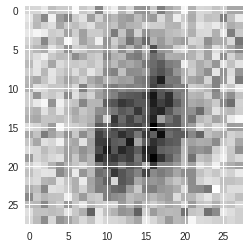

Batch:  8 Cost:  0.617405354976654


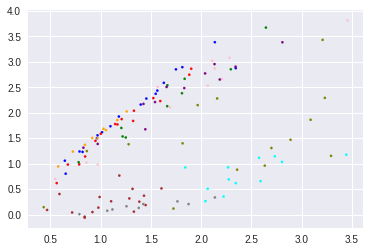

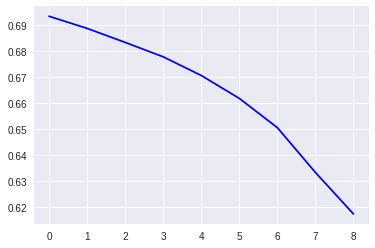

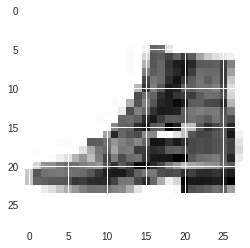

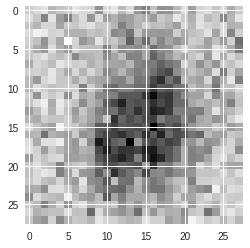

Batch:  9 Cost:  0.5981649160385132


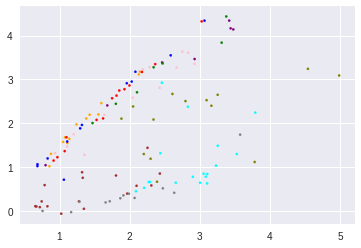

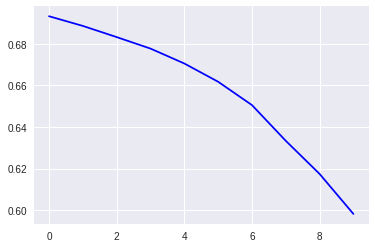

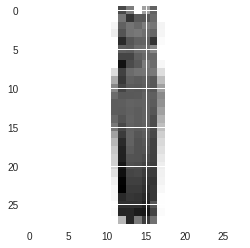

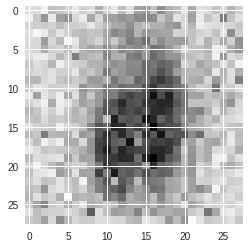

Batch:  10 Cost:  0.5743600726127625


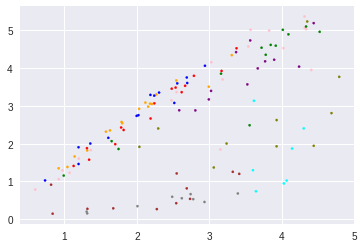

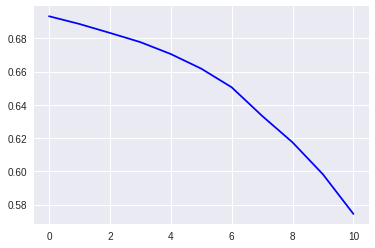

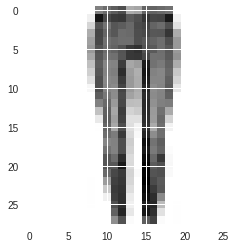

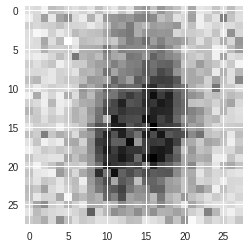

Batch:  11 Cost:  0.5636398792266846


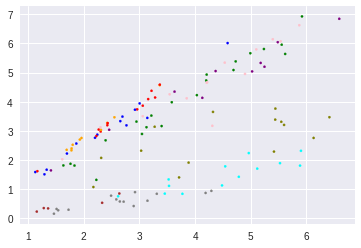

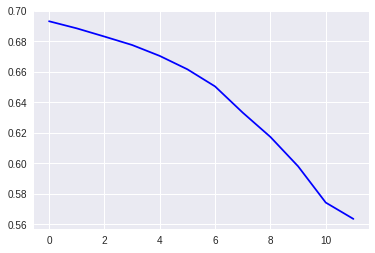

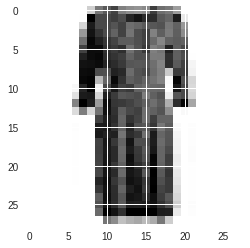

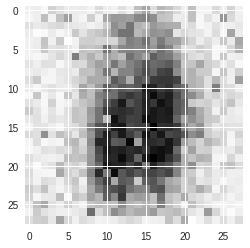

Batch:  12 Cost:  0.5644344687461853


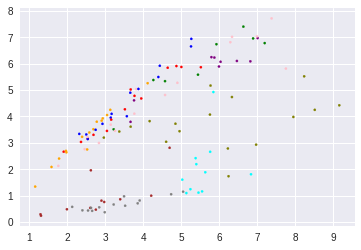

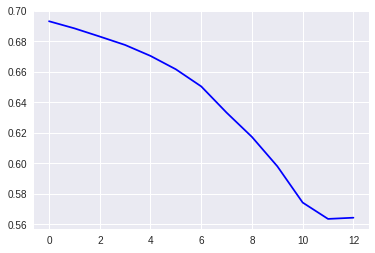

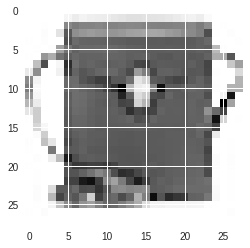

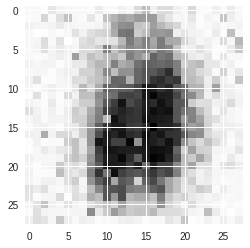

Batch:  13 Cost:  0.543235182762146


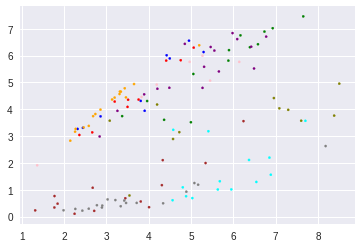

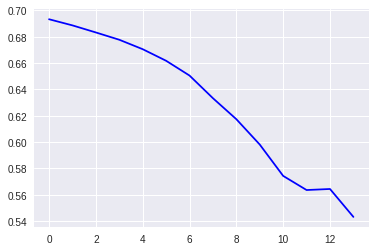

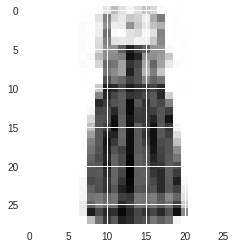

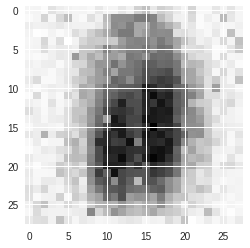

Batch:  14 Cost:  0.5436513423919678


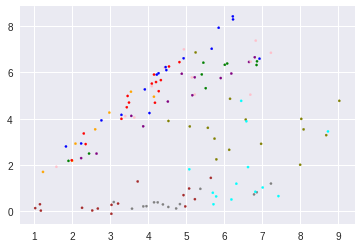

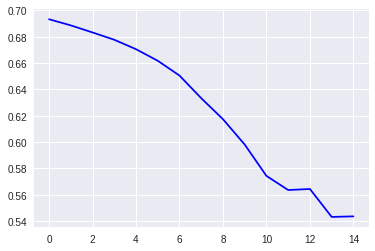

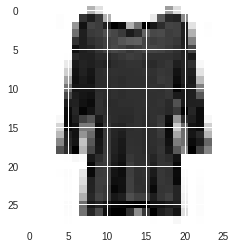

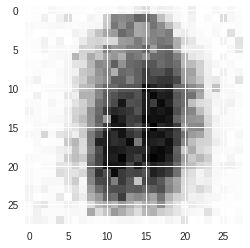

Batch:  15 Cost:  0.5023290514945984


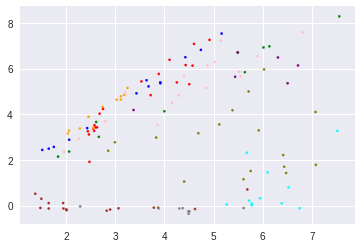

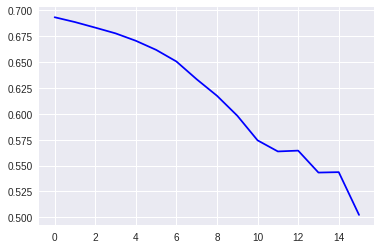

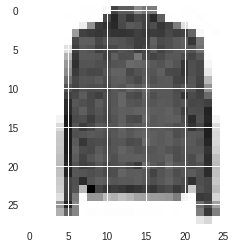

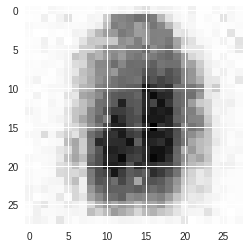

Batch:  16 Cost:  0.5015609264373779


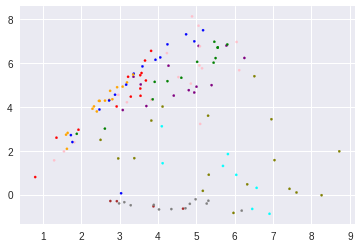

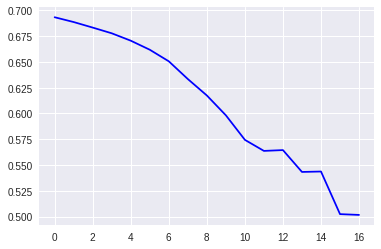

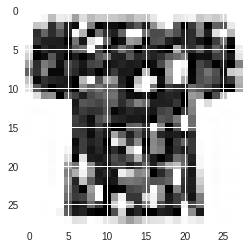

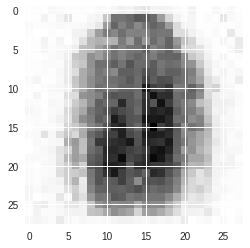

Batch:  17 Cost:  0.484732985496521


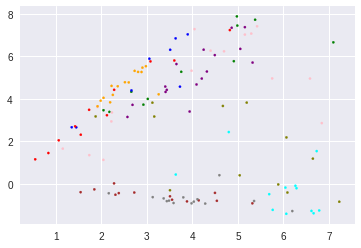

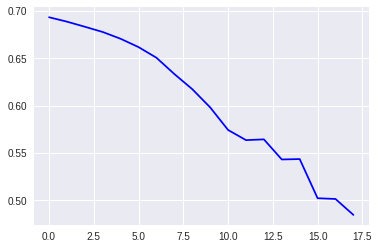

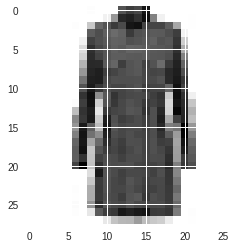

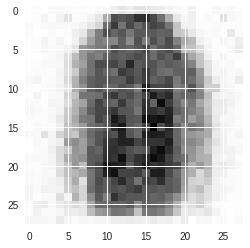

Batch:  18 Cost:  0.4865599274635315


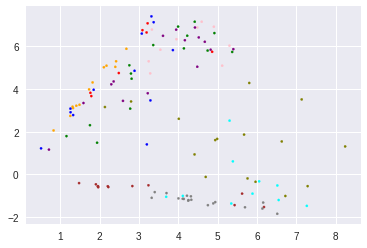

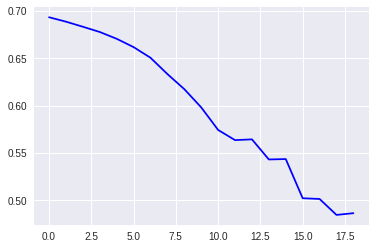

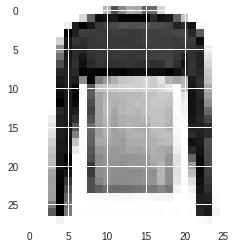

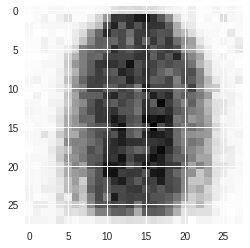

Batch:  19 Cost:  0.48498284816741943


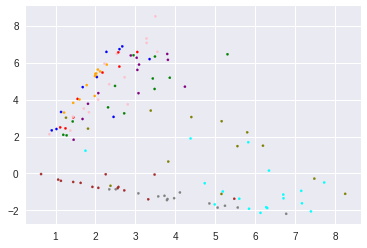

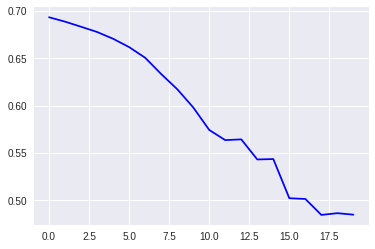

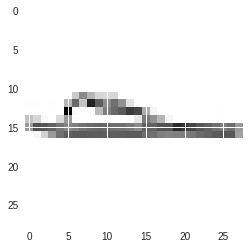

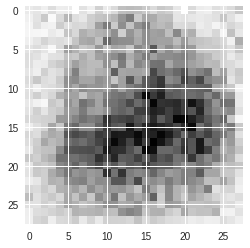

Batch:  20 Cost:  0.4745851159095764


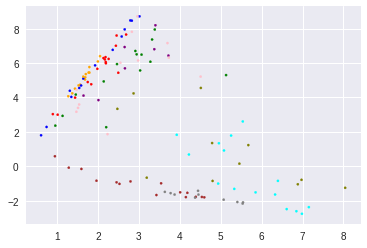

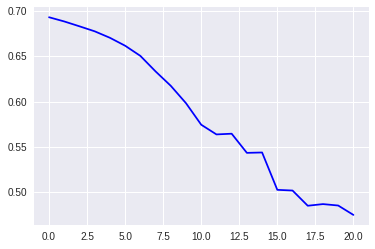

Batch:  21 Cost:  0.4619430601596832


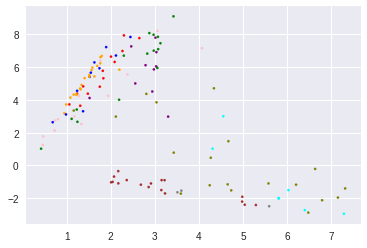

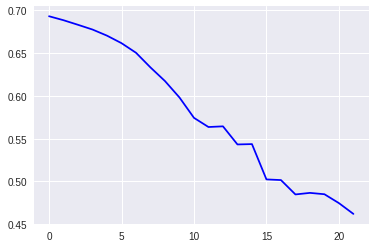

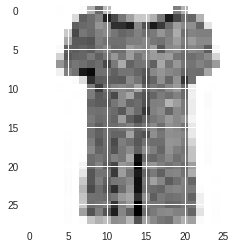

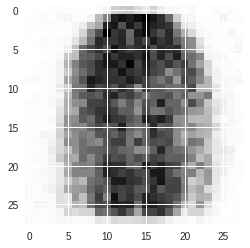

Batch:  22 Cost:  0.4578746557235718


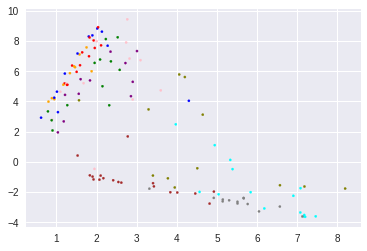

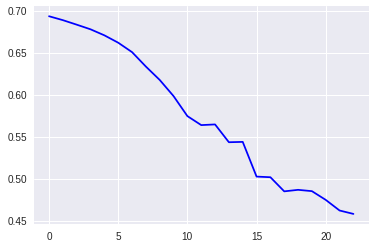

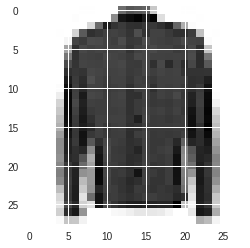

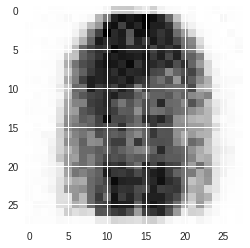

Batch:  23 Cost:  0.45133066177368164


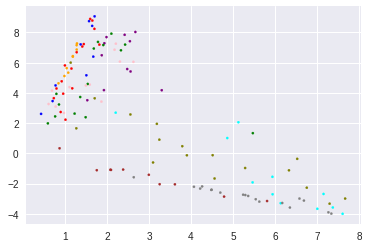

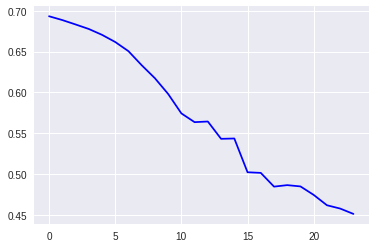

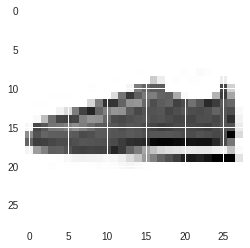

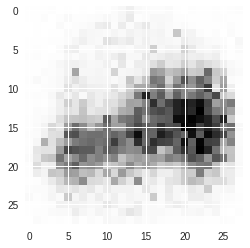

Batch:  24 Cost:  0.45892244577407837


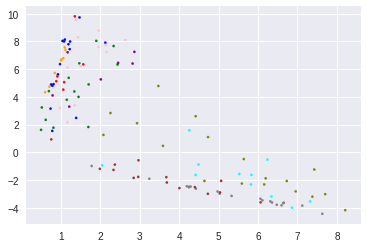

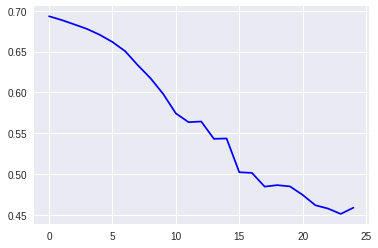

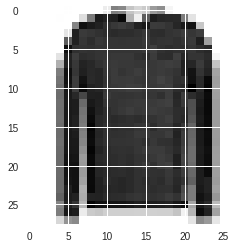

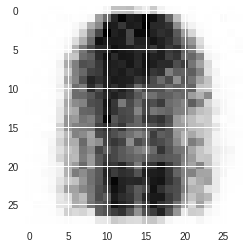

Batch:  25 Cost:  0.45006120204925537


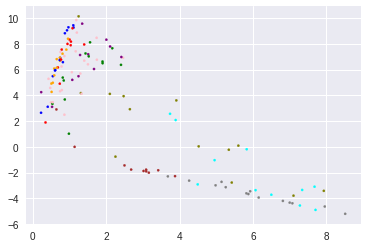

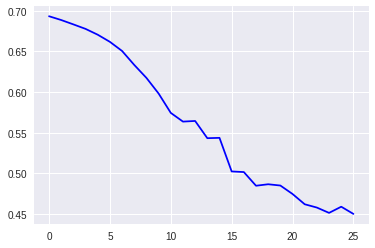

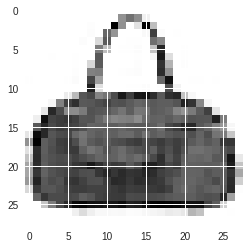

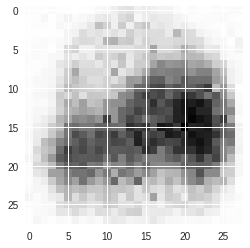

Batch:  26 Cost:  0.4452349543571472


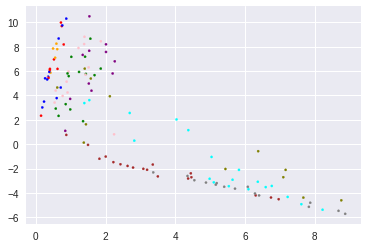

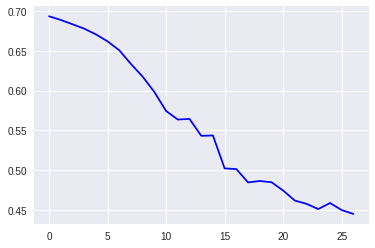

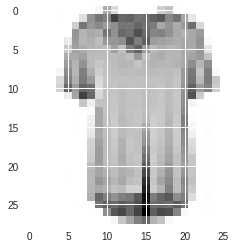

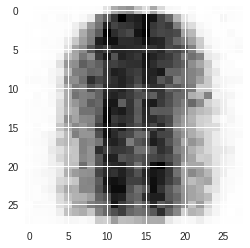

Batch:  27 Cost:  0.4496005177497864


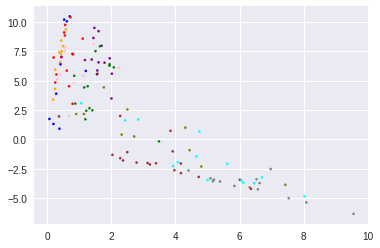

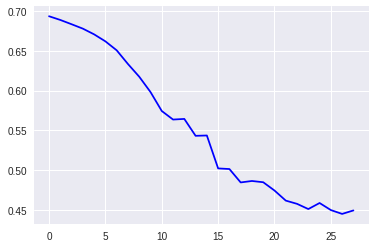

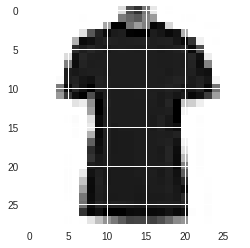

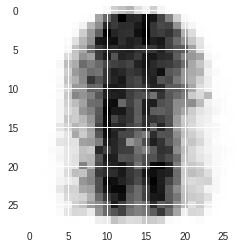

Batch:  28 Cost:  0.4570064842700958


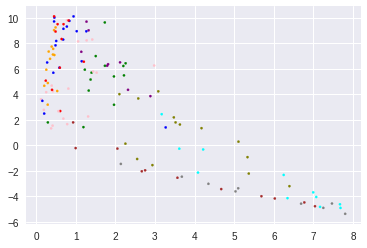

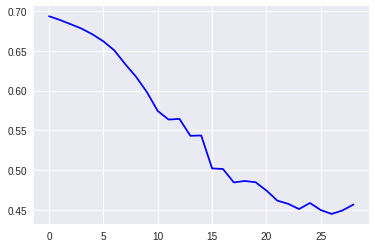

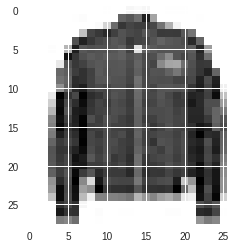

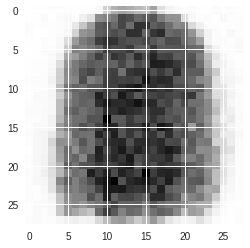

Batch:  29 Cost:  0.43979325890541077


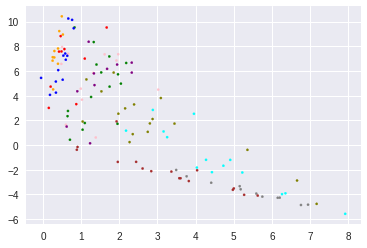

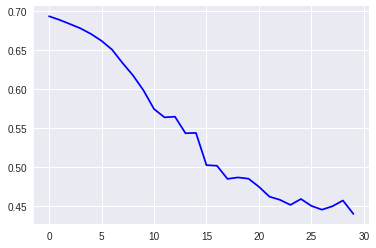

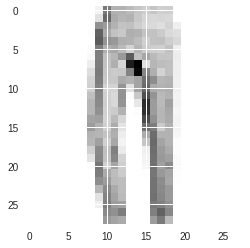

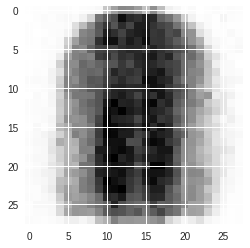

Batch:  30 Cost:  0.4268898069858551


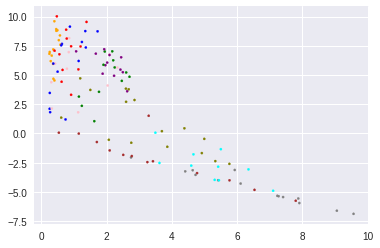

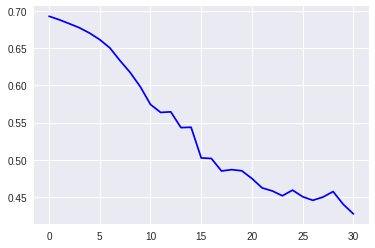

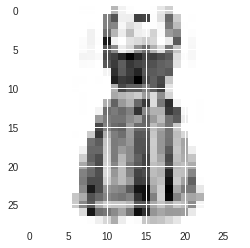

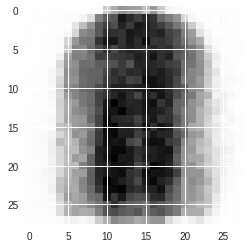

Batch:  31 Cost:  0.44634655117988586


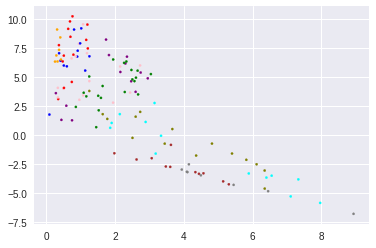

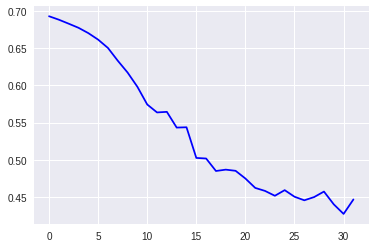

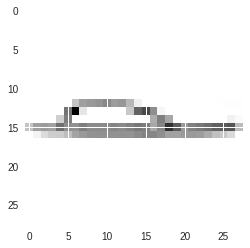

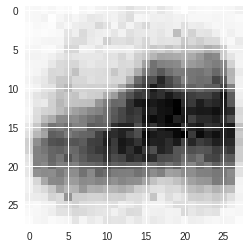

Batch:  32 Cost:  0.41562753915786743


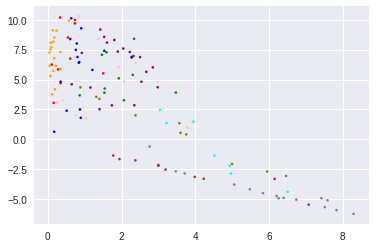

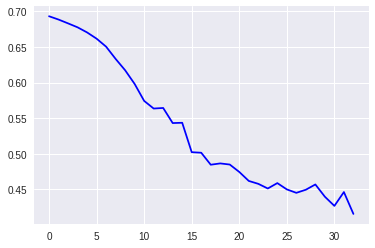

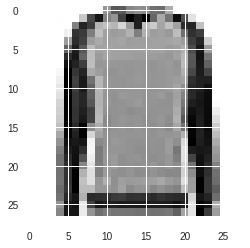

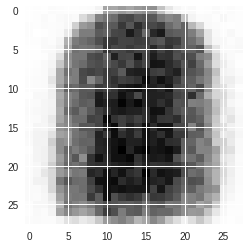

Batch:  33 Cost:  0.4086781442165375


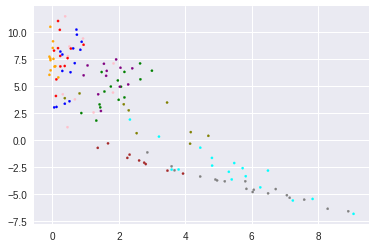

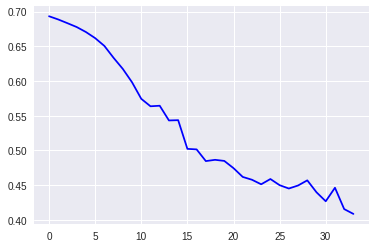

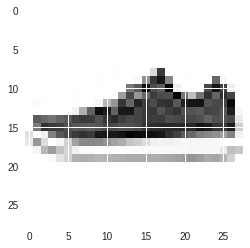

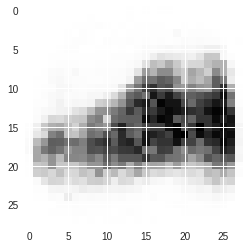

Batch:  34 Cost:  0.4123818874359131


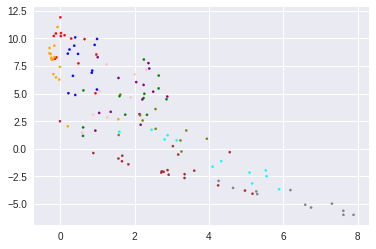

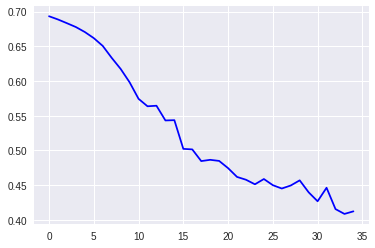

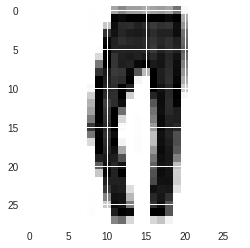

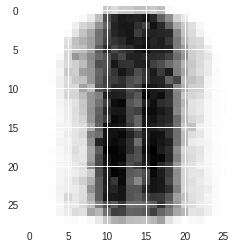

Batch:  35 Cost:  0.41445159912109375


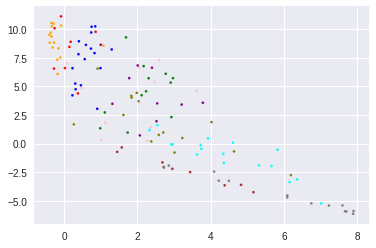

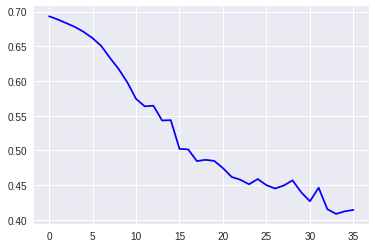

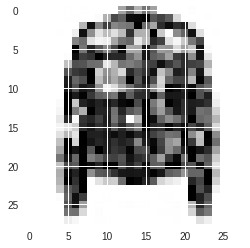

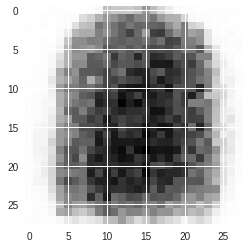

Batch:  36 Cost:  0.4128682315349579


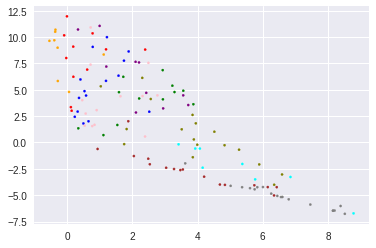

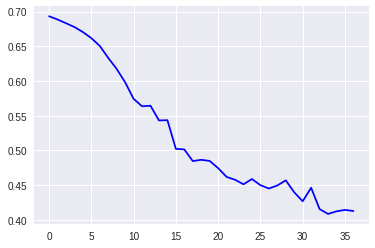

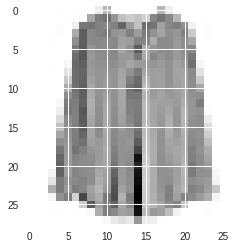

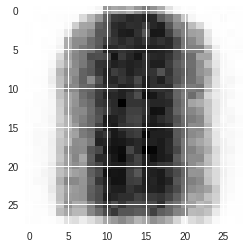

Batch:  37 Cost:  0.4124007821083069


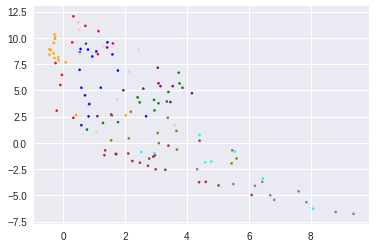

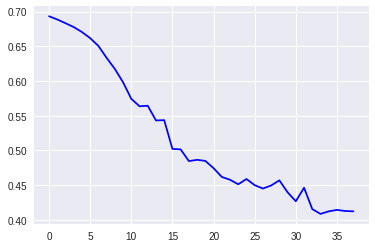

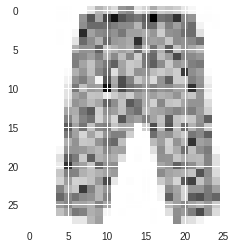

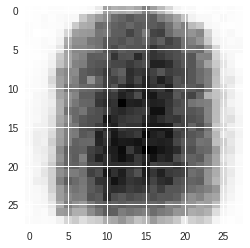

Batch:  38 Cost:  0.40686509013175964


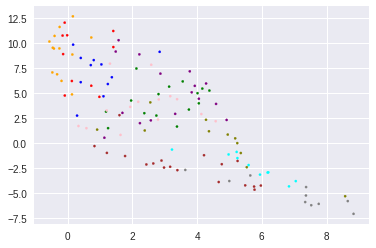

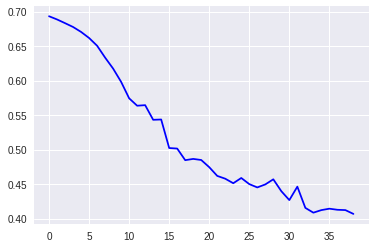

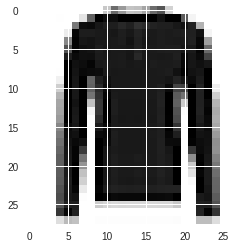

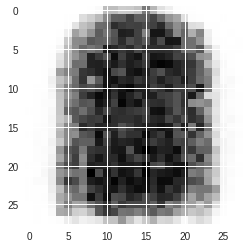

Batch:  39 Cost:  0.4068651497364044


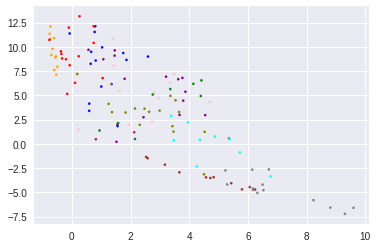

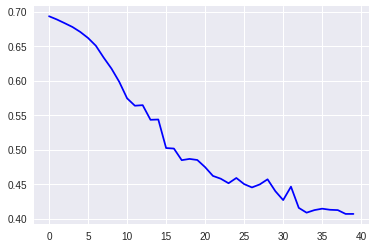

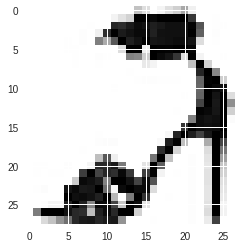

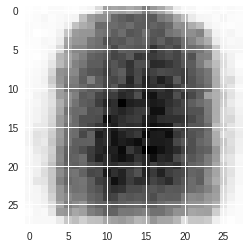

Batch:  40 Cost:  0.39550936222076416


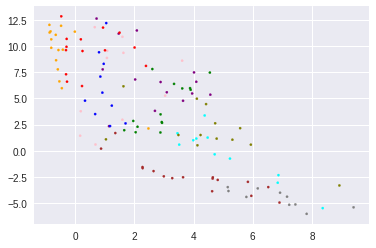

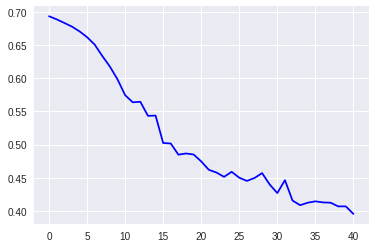

Batch:  41 Cost:  0.40706902742385864


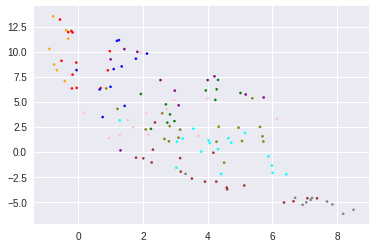

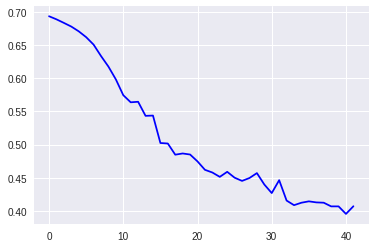

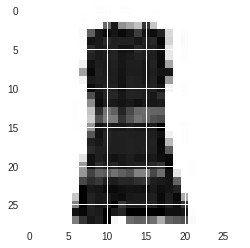

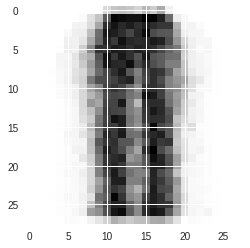

Batch:  42 Cost:  0.3954661190509796


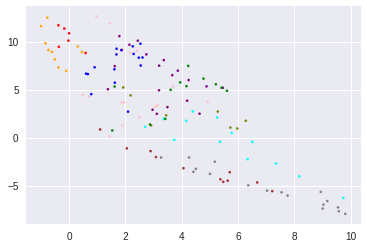

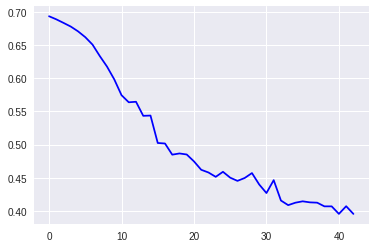

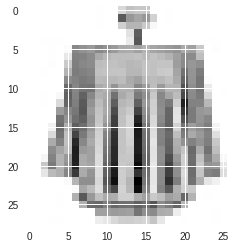

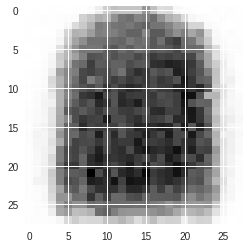

Batch:  43 Cost:  0.4091832935810089


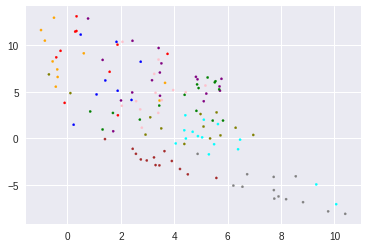

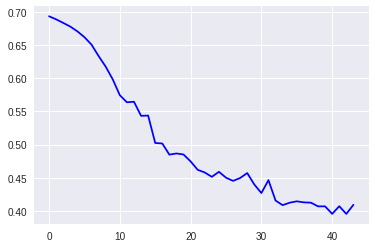

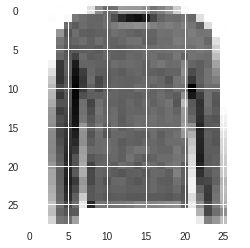

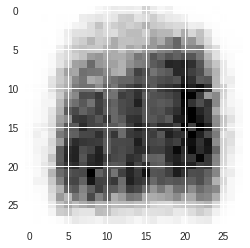

Batch:  44 Cost:  0.37055790424346924


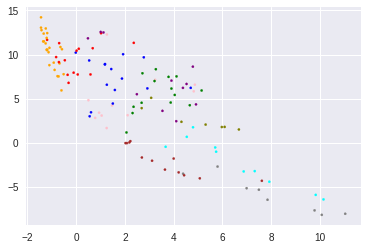

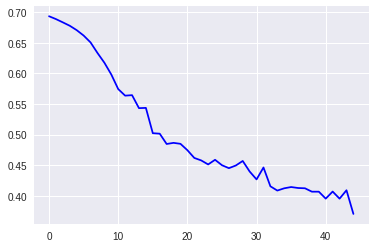

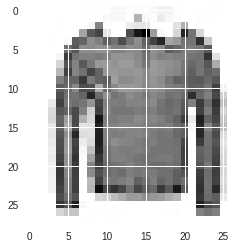

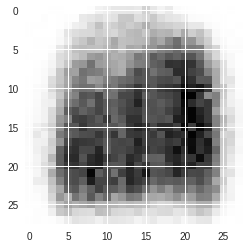

Batch:  45 Cost:  0.3883337676525116


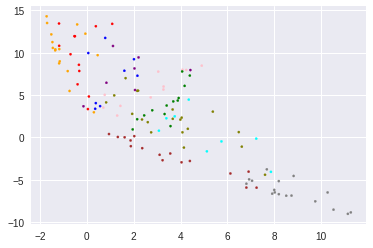

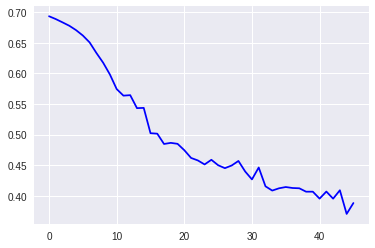

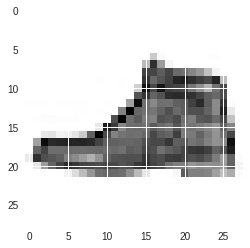

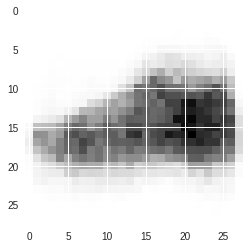

Batch:  46 Cost:  0.38665610551834106


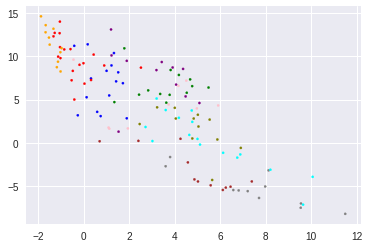

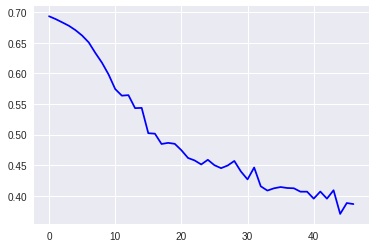

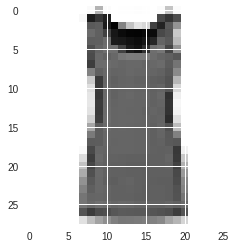

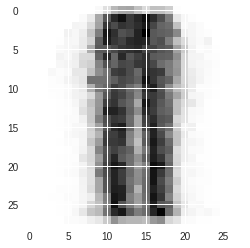

Batch:  47 Cost:  0.397943913936615


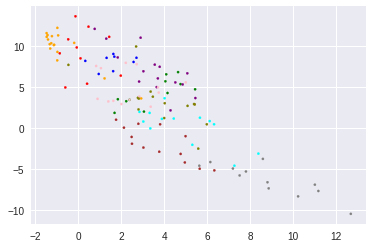

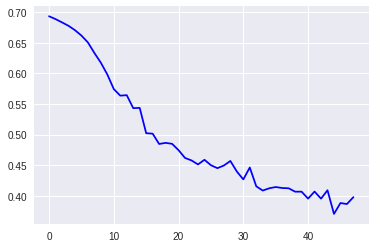

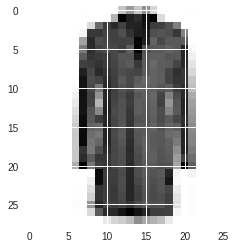

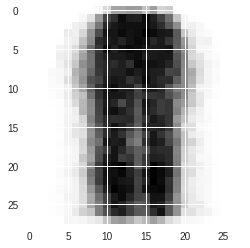

Batch:  48 Cost:  0.38579267263412476


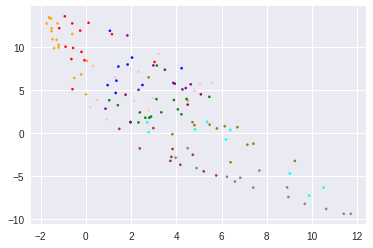

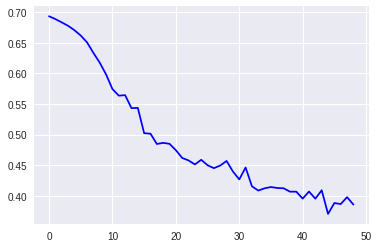

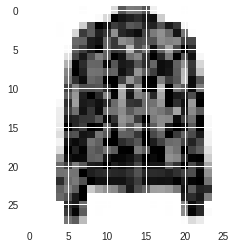

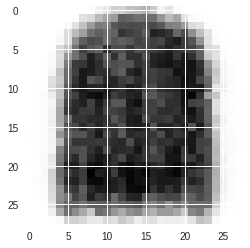

Batch:  49 Cost:  0.3696446418762207


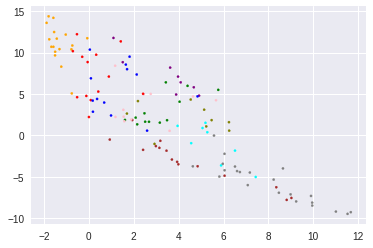

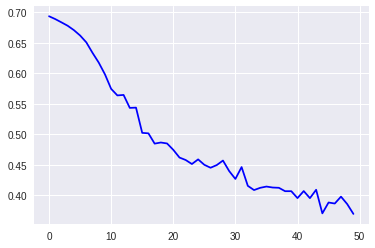

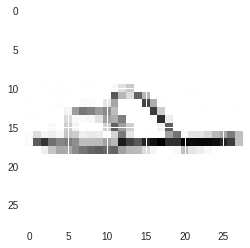

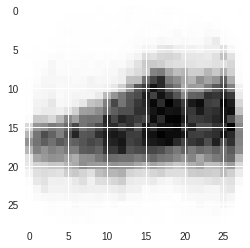

Batch:  50 Cost:  0.38921406865119934


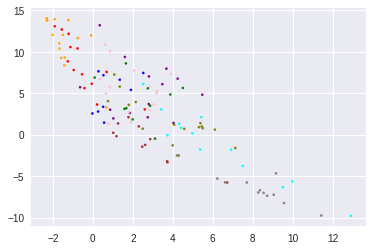

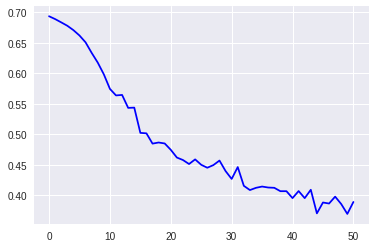

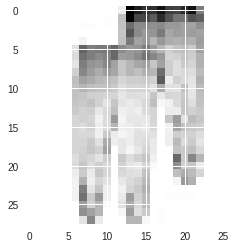

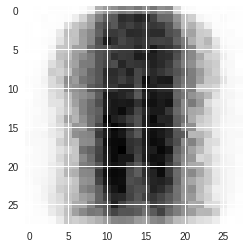

Batch:  51 Cost:  0.392391562461853


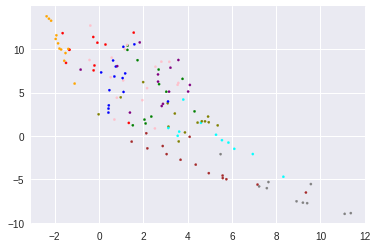

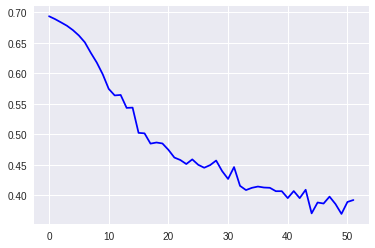

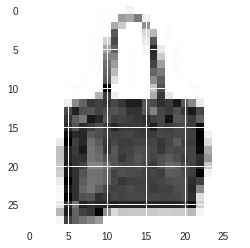

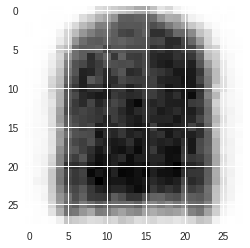

Batch:  52 Cost:  0.3935586214065552


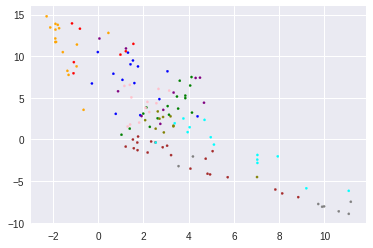

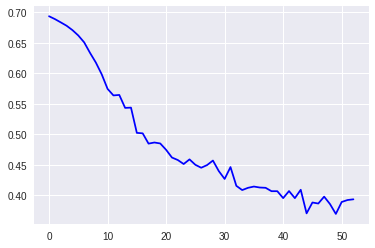

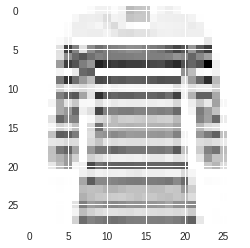

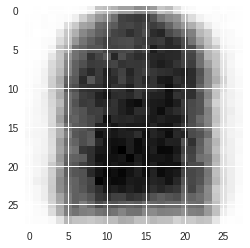

Batch:  53 Cost:  0.4035545587539673


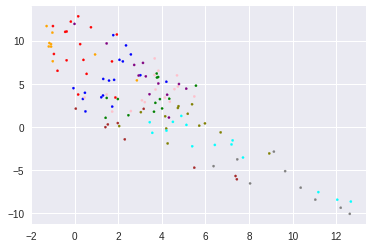

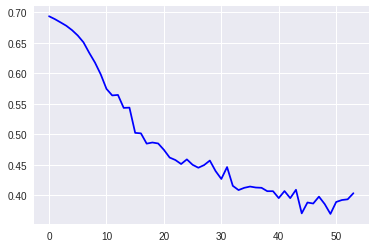

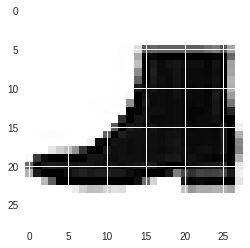

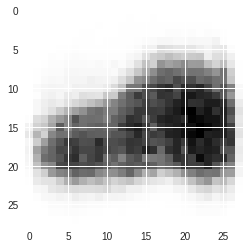

Batch:  54 Cost:  0.37361040711402893


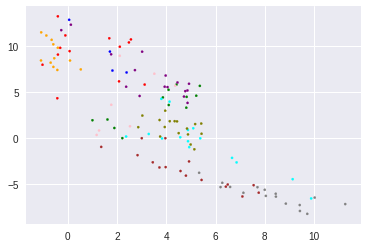

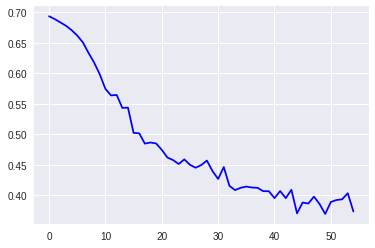

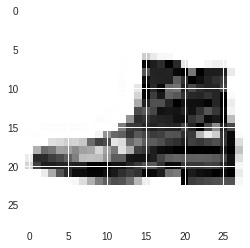

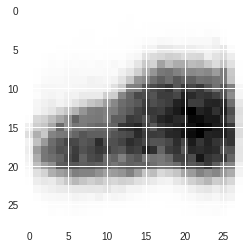

Batch:  55 Cost:  0.3575587272644043


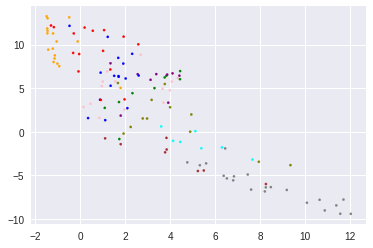

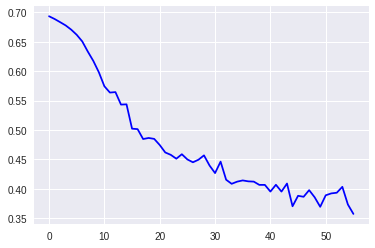

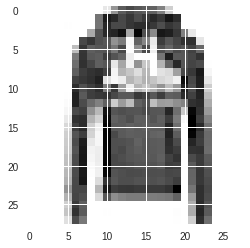

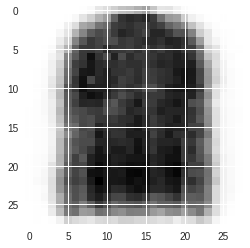

Batch:  56 Cost:  0.3766770660877228


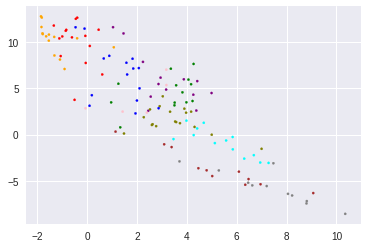

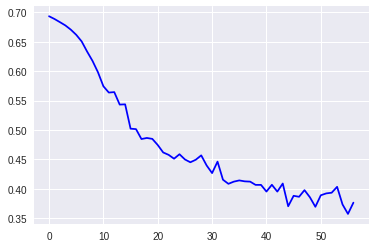

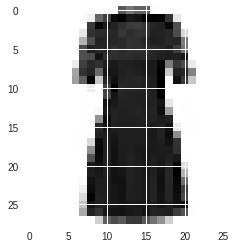

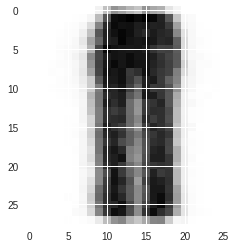

Batch:  57 Cost:  0.36887815594673157


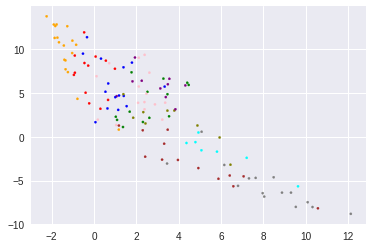

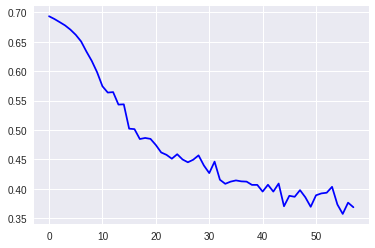

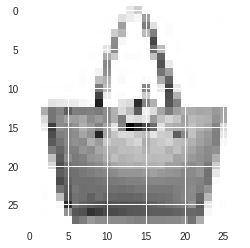

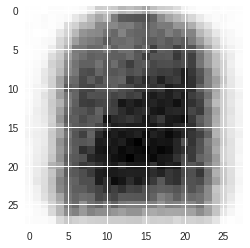

Batch:  58 Cost:  0.3697783946990967


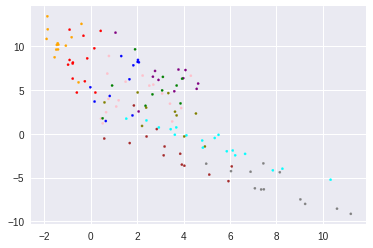

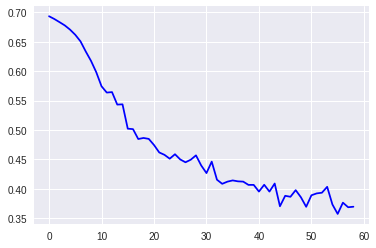

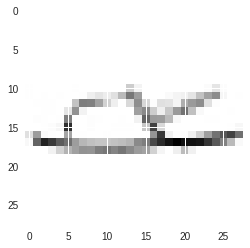

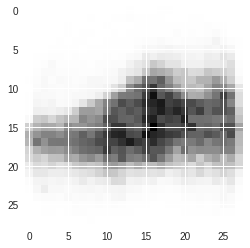

Batch:  59 Cost:  0.37877339124679565


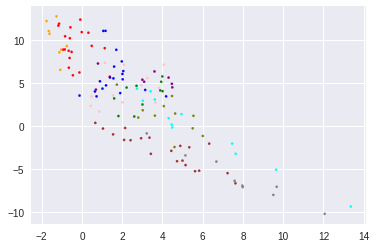

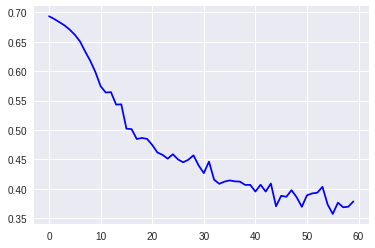

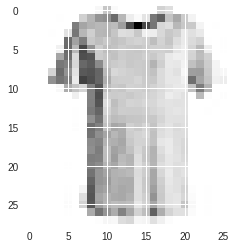

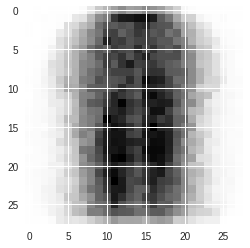

Batch:  60 Cost:  0.3788301646709442


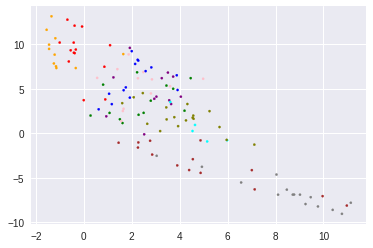

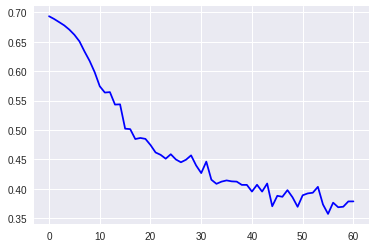

Batch:  61 Cost:  0.37044084072113037


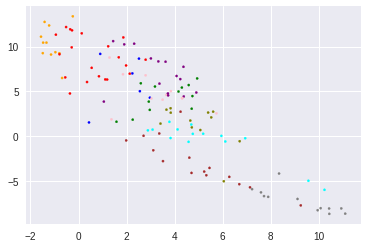

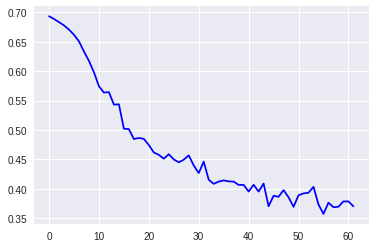

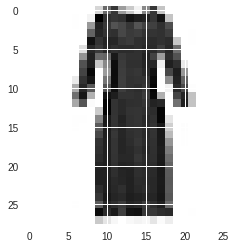

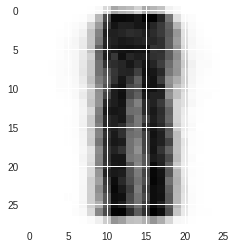

Batch:  62 Cost:  0.3853904902935028


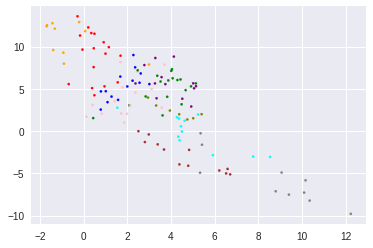

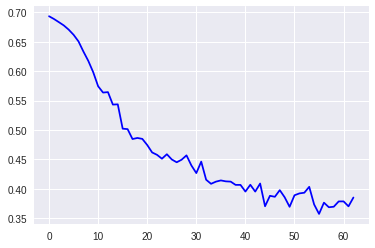

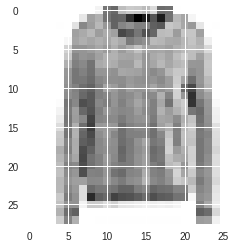

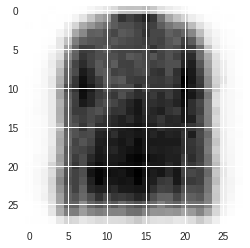

Batch:  63 Cost:  0.38038599491119385


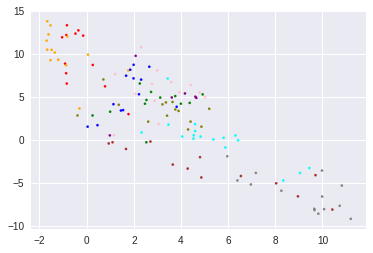

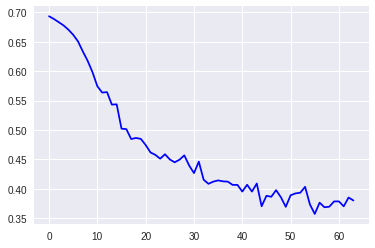

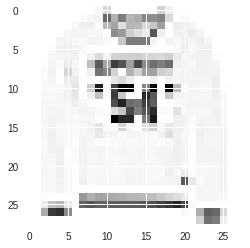

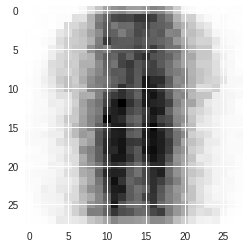

Batch:  64 Cost:  0.37181779742240906


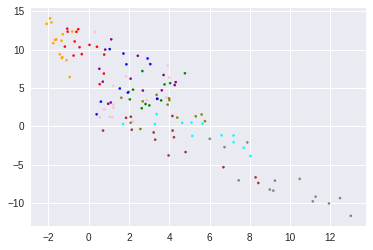

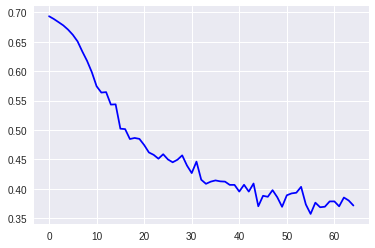

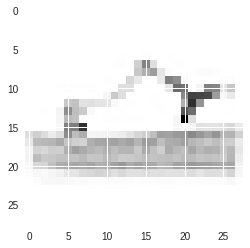

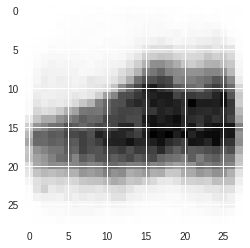

Batch:  65 Cost:  0.37755608558654785


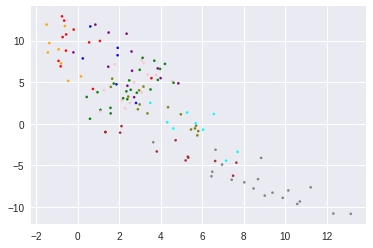

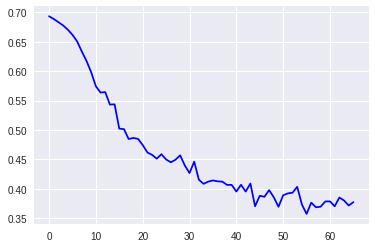

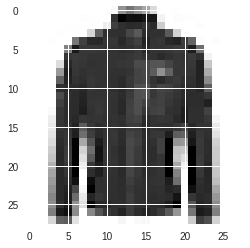

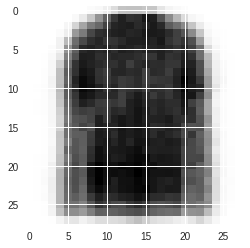

Batch:  66 Cost:  0.3824917674064636


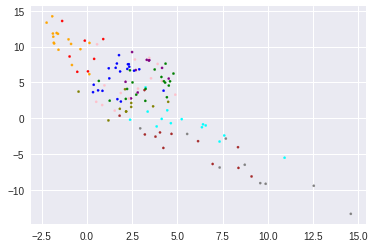

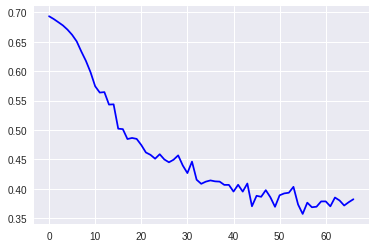

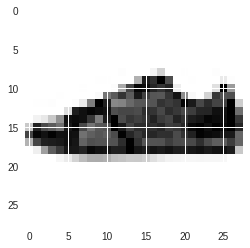

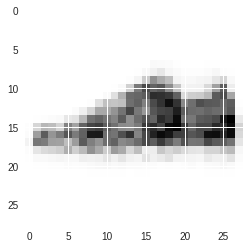

Batch:  67 Cost:  0.37789520621299744


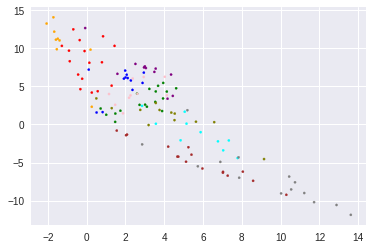

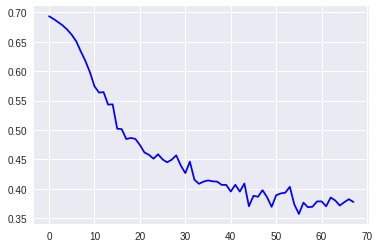

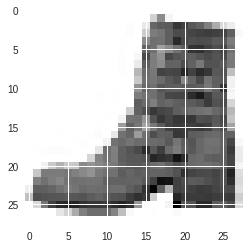

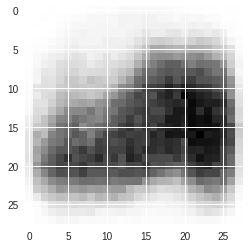

Batch:  68 Cost:  0.36956191062927246


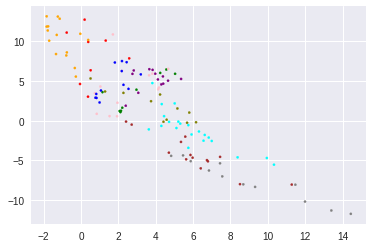

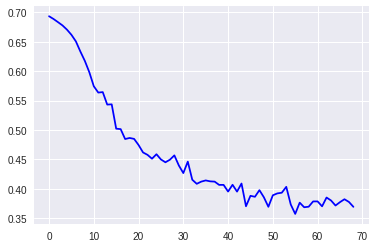

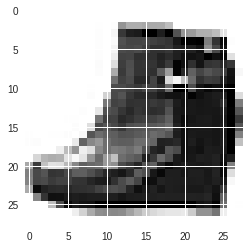

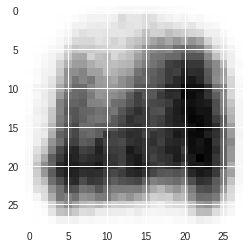

Batch:  69 Cost:  0.37498170137405396


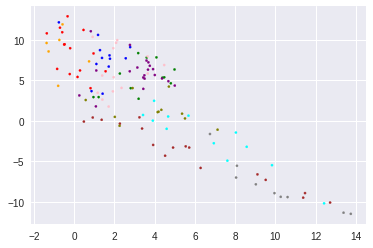

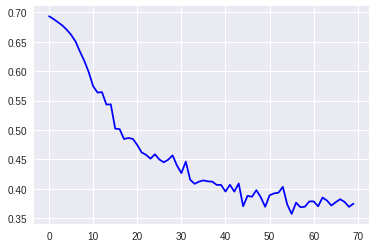

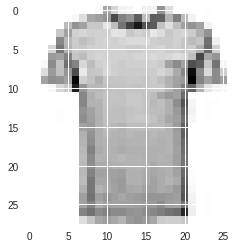

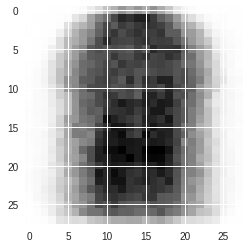

Batch:  70 Cost:  0.36803221702575684


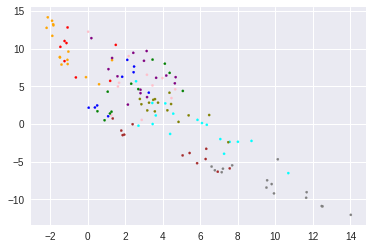

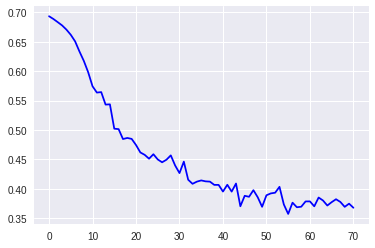

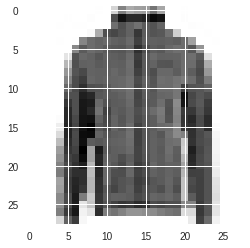

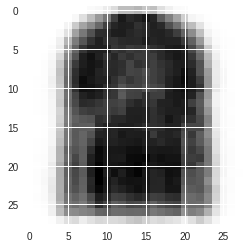

Batch:  71 Cost:  0.3703003227710724


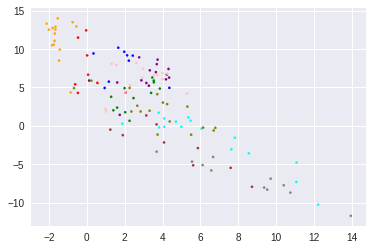

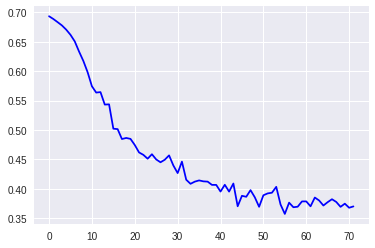

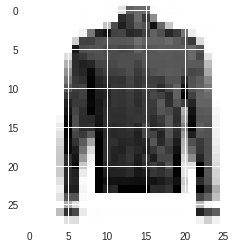

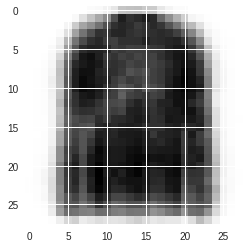

Batch:  72 Cost:  0.3620760440826416


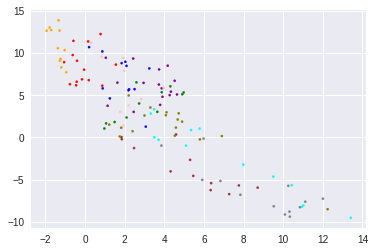

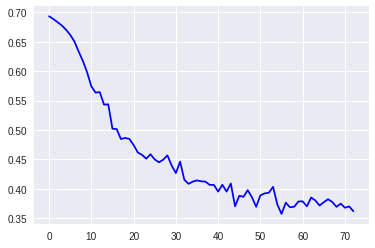

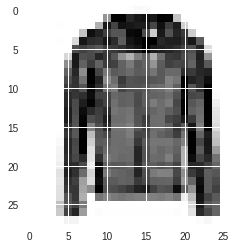

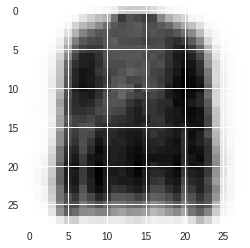

Batch:  73 Cost:  0.36089831590652466


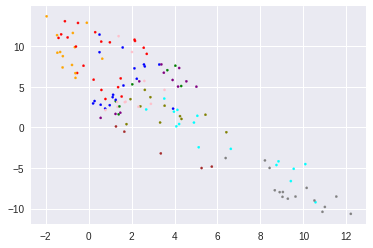

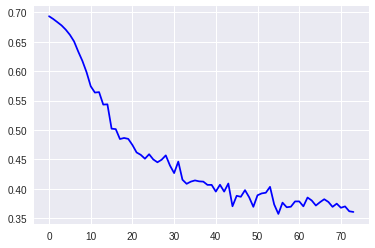

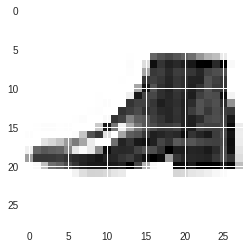

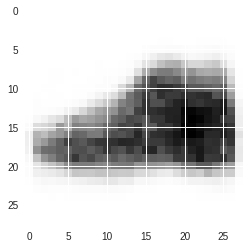

Batch:  74 Cost:  0.3606504797935486


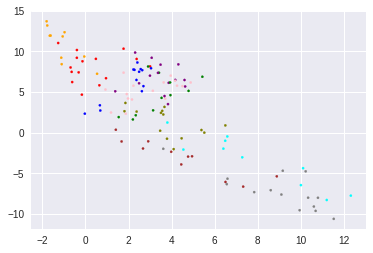

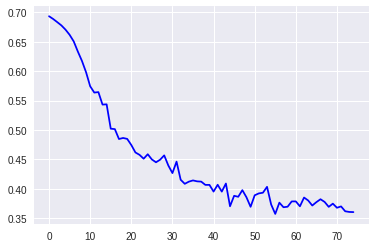

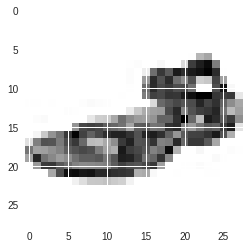

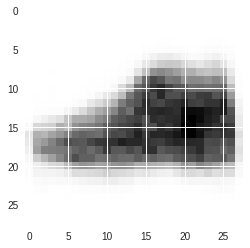

Batch:  75 Cost:  0.36772334575653076


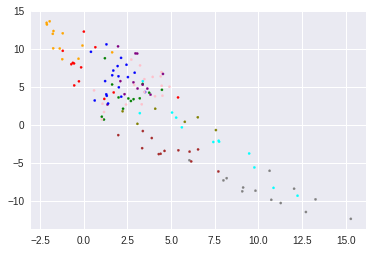

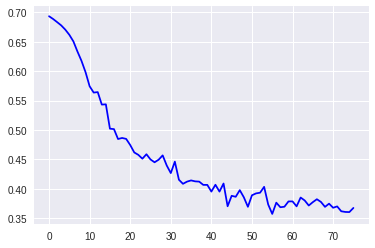

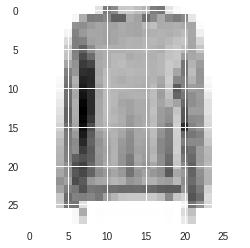

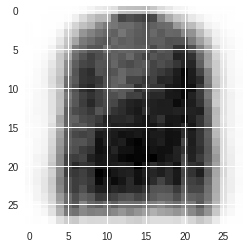

Batch:  76 Cost:  0.3761305809020996


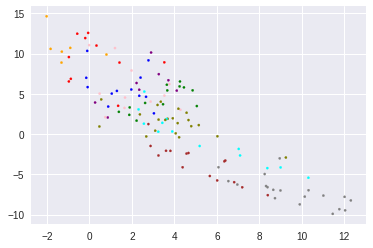

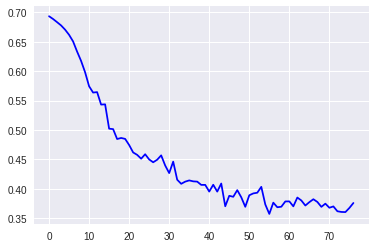

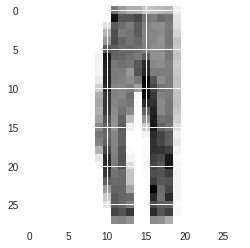

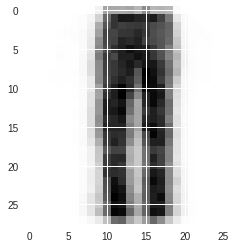

Batch:  77 Cost:  0.3704780340194702


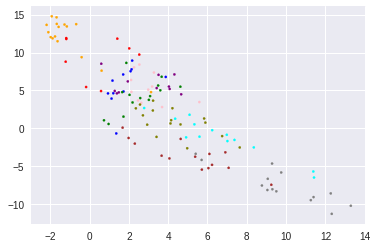

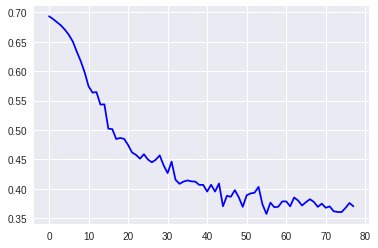

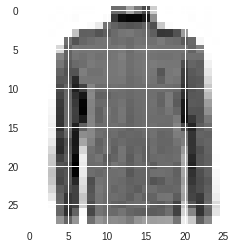

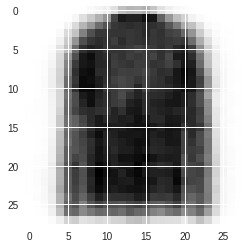

Batch:  78 Cost:  0.3872716426849365


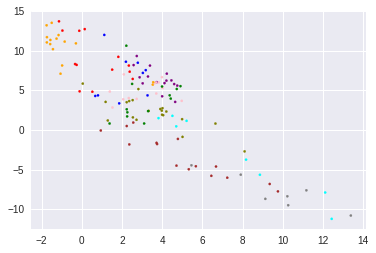

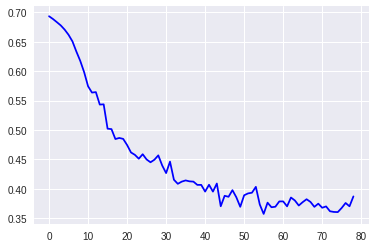

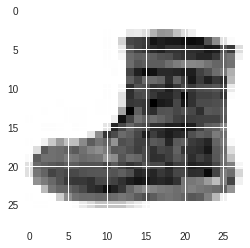

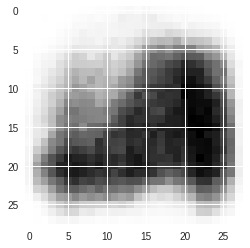

Batch:  79 Cost:  0.3539664149284363


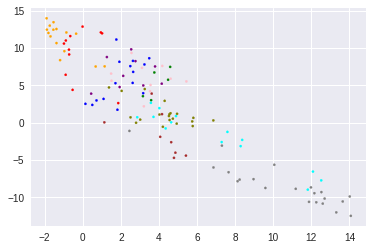

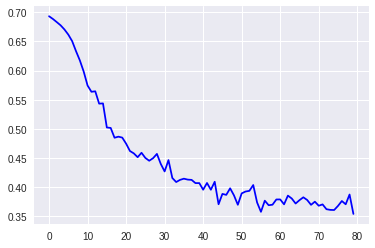

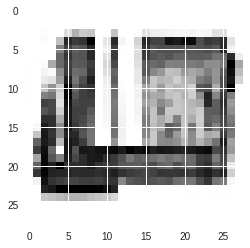

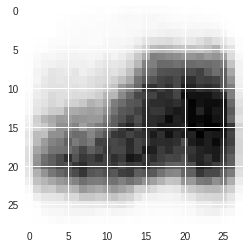

Batch:  80 Cost:  0.35539117455482483


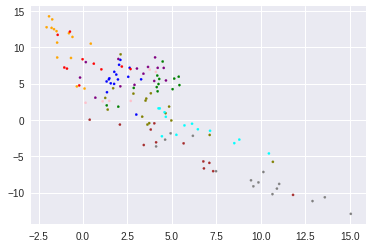

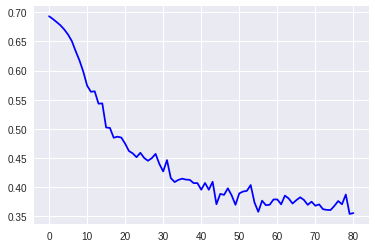

Batch:  81 Cost:  0.37011006474494934


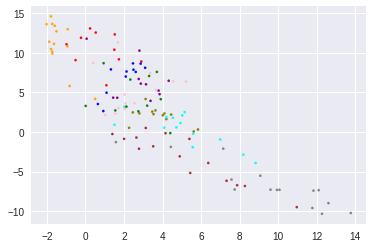

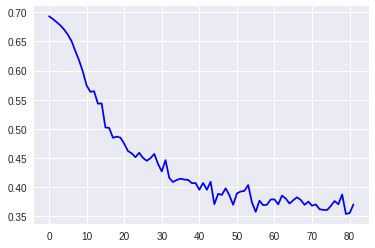

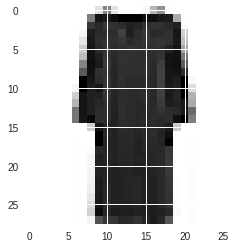

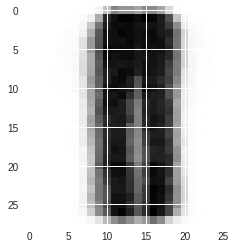

Batch:  82 Cost:  0.3572752773761749


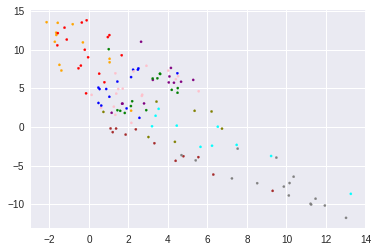

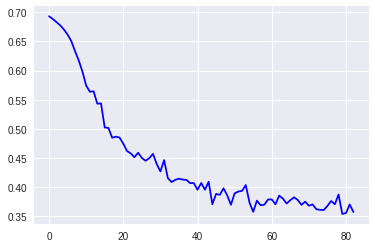

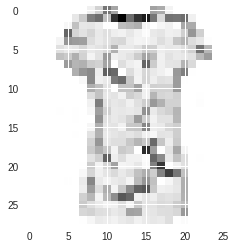

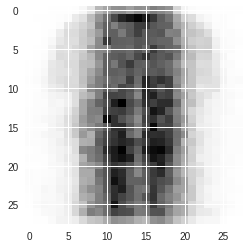

Batch:  83 Cost:  0.367453008890152


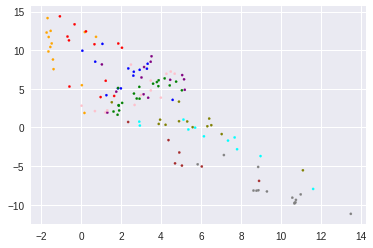

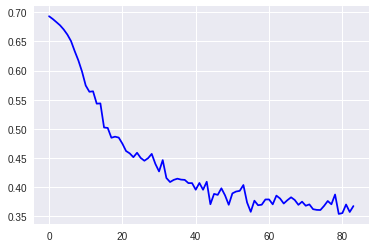

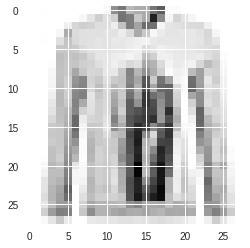

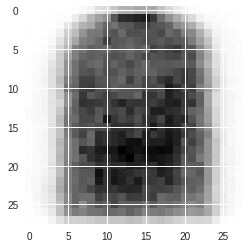

Batch:  84 Cost:  0.35251888632774353


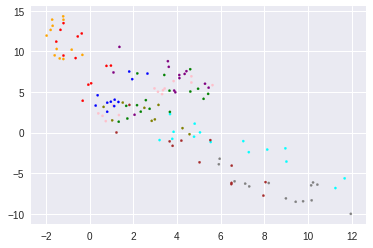

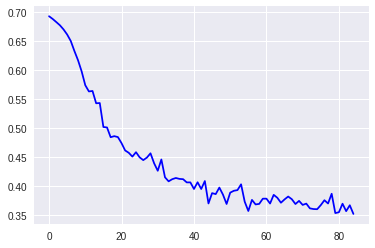

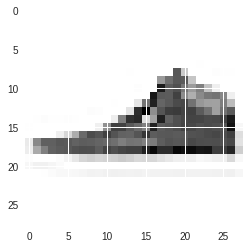

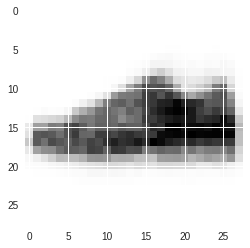

Batch:  85 Cost:  0.3513298034667969


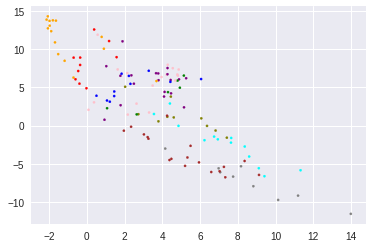

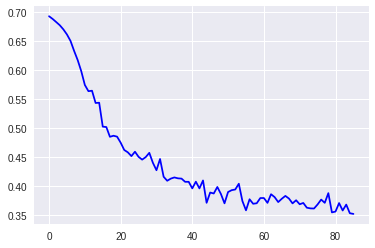

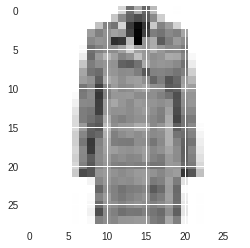

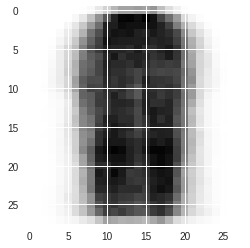

Batch:  86 Cost:  0.35721728205680847


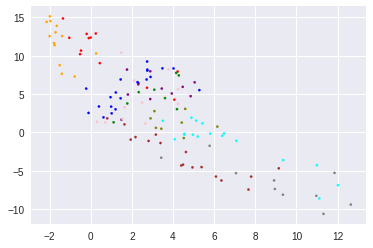

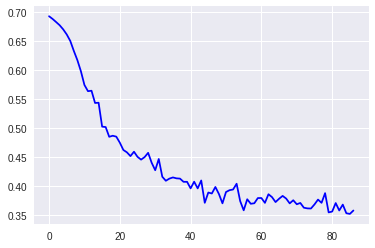

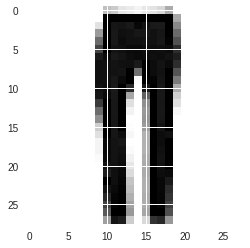

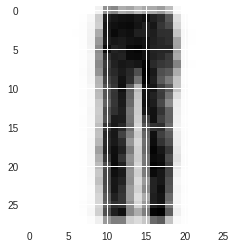

Batch:  87 Cost:  0.35278087854385376


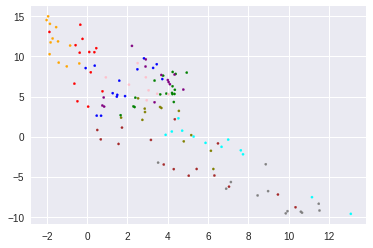

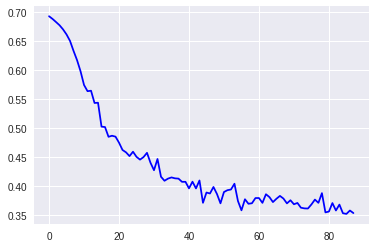

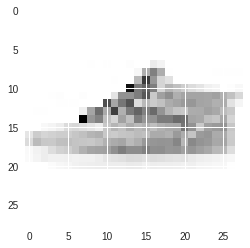

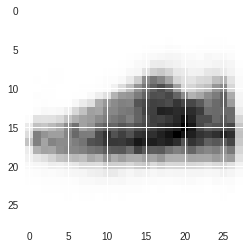

Batch:  88 Cost:  0.3598265051841736


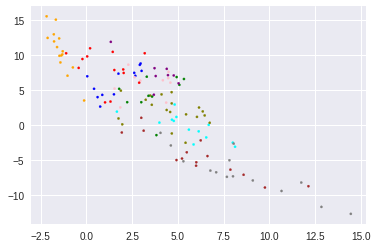

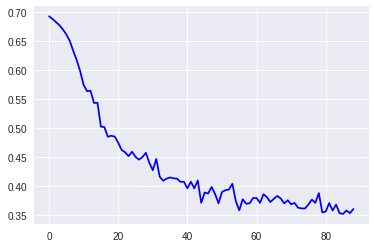

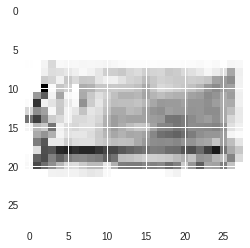

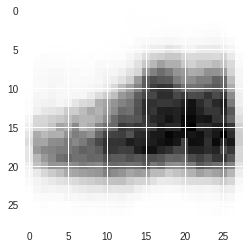

Batch:  89 Cost:  0.35225802659988403


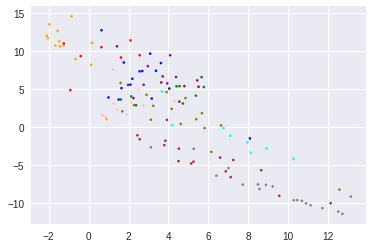

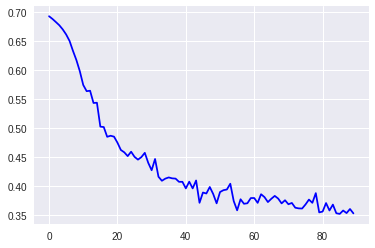

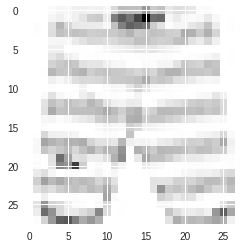

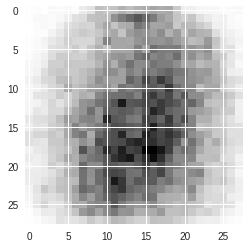

Batch:  90 Cost:  0.3550865054130554


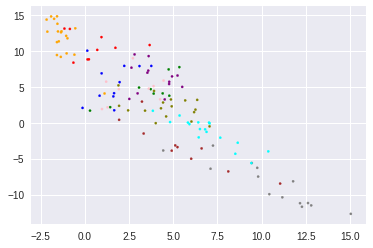

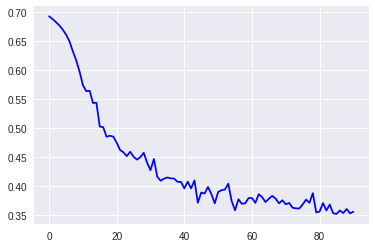

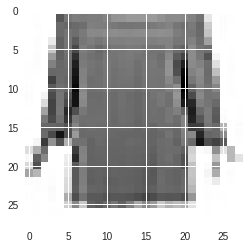

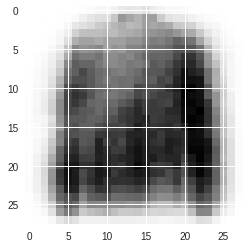

Batch:  91 Cost:  0.3776185214519501


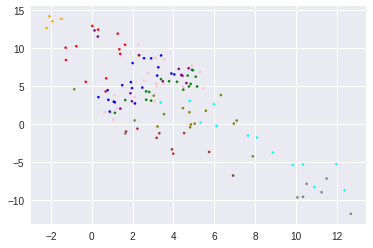

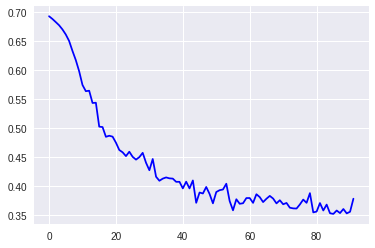

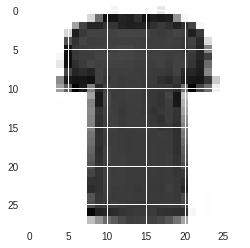

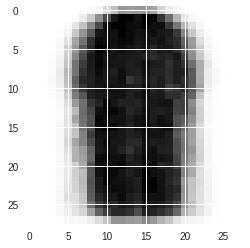

Batch:  92 Cost:  0.3488272726535797


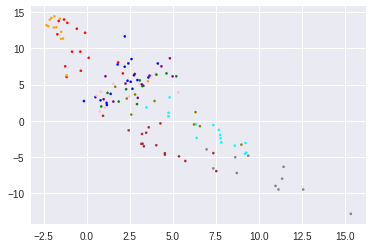

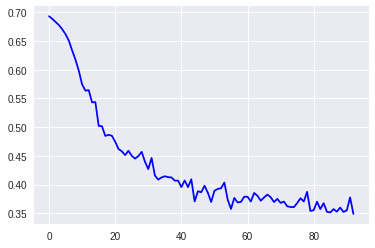

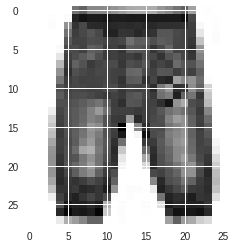

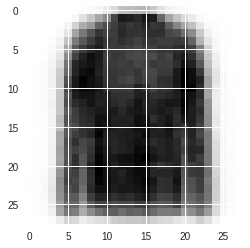

Batch:  93 Cost:  0.35807499289512634


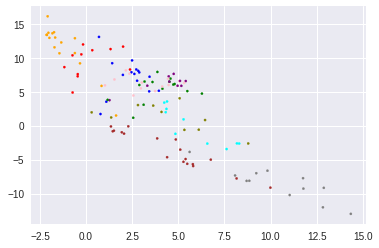

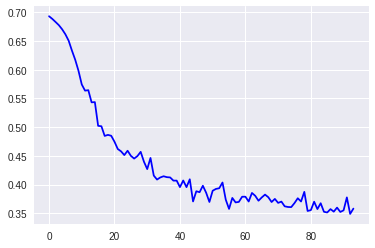

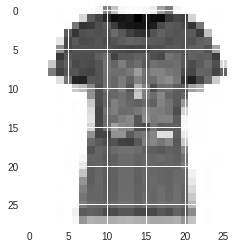

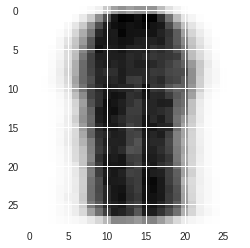

Batch:  94 Cost:  0.36078333854675293


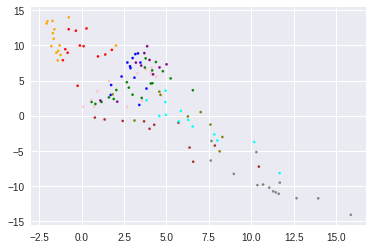

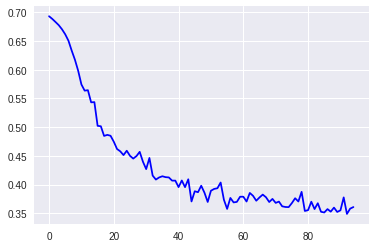

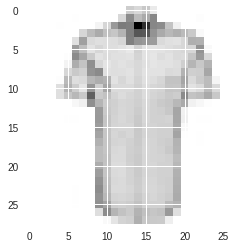

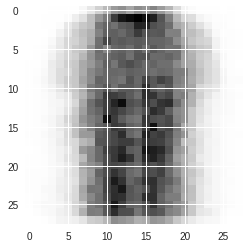

Batch:  95 Cost:  0.3446044921875


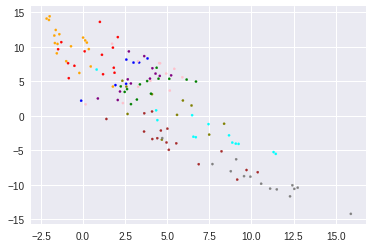

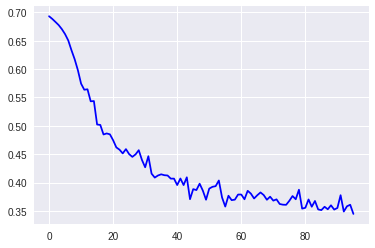

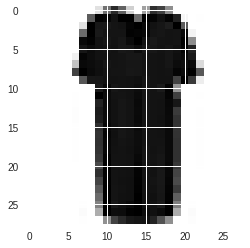

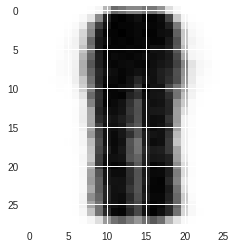

Batch:  96 Cost:  0.3544488251209259


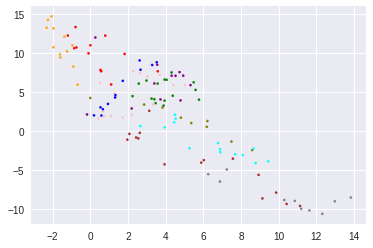

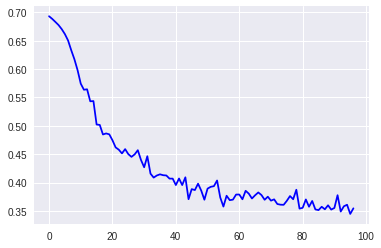

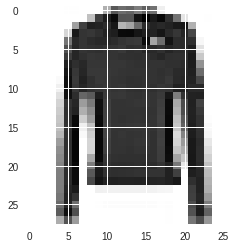

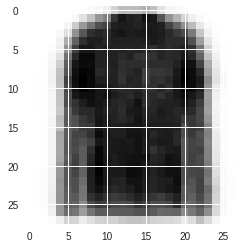

Batch:  97 Cost:  0.3621487021446228


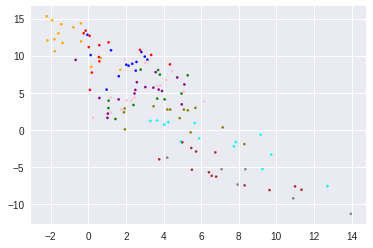

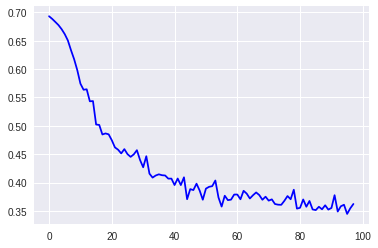

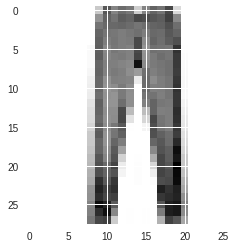

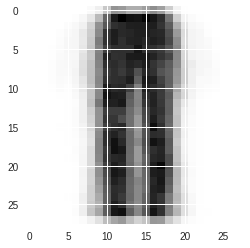

Batch:  98 Cost:  0.3719514012336731


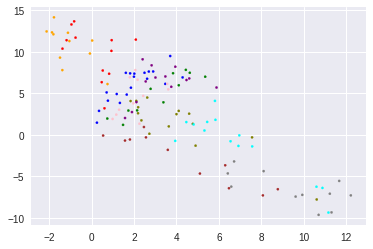

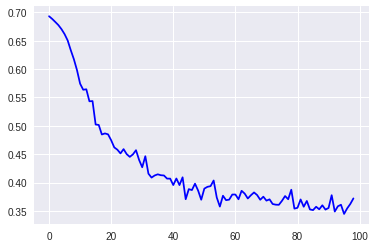

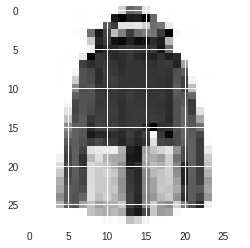

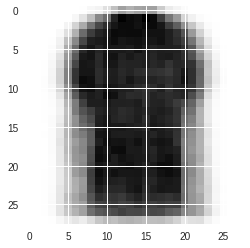

Batch:  99 Cost:  0.36532557010650635


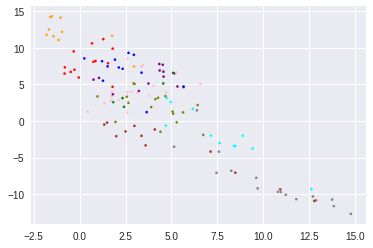

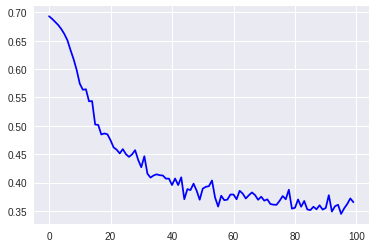

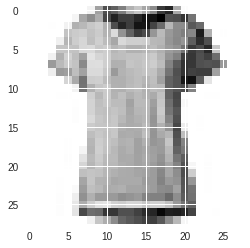

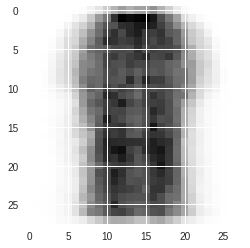

Batch:  100 Cost:  0.3560463786125183


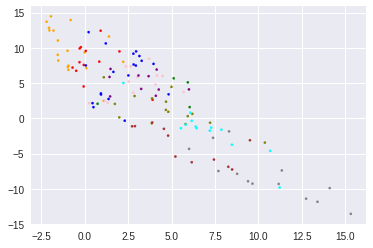

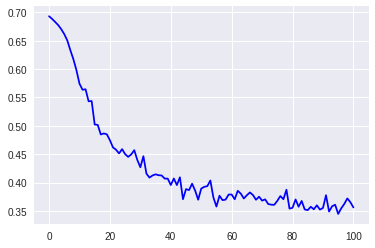

Batch:  101 Cost:  0.3470768928527832


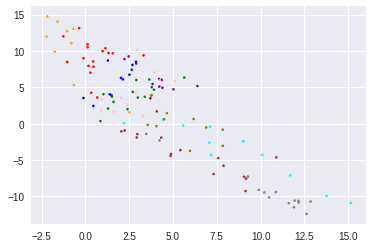

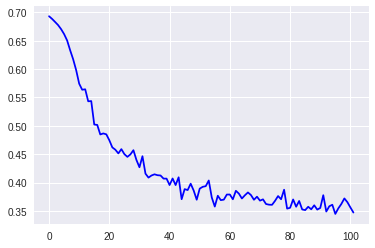

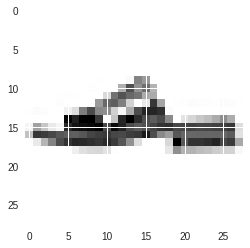

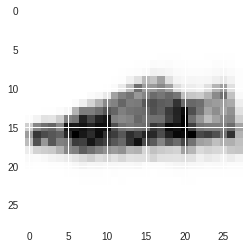

Batch:  102 Cost:  0.3739980459213257


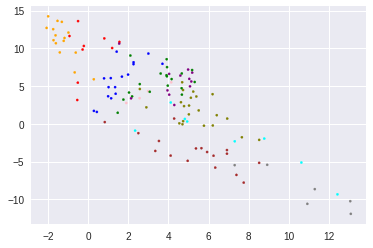

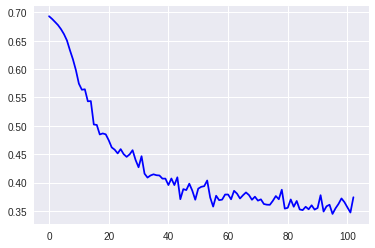

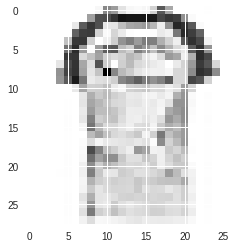

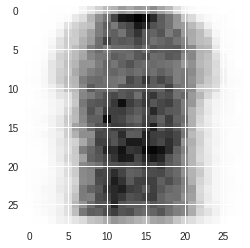

Batch:  103 Cost:  0.3551692068576813


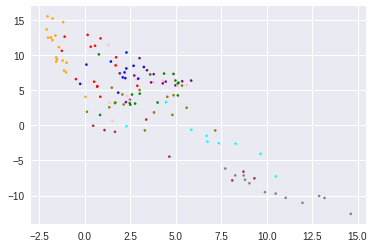

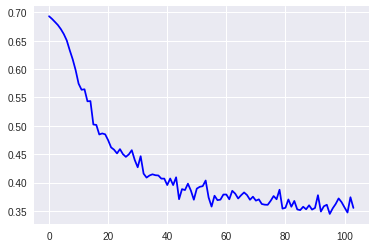

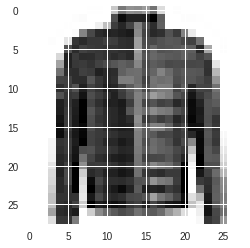

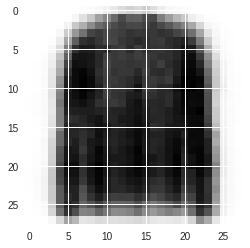

Batch:  104 Cost:  0.34247249364852905


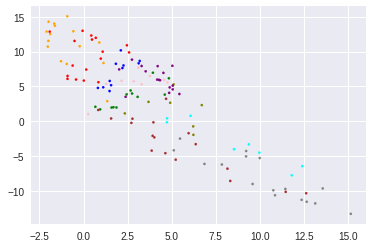

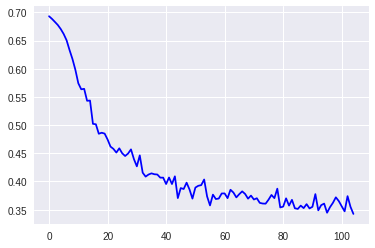

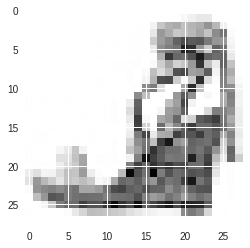

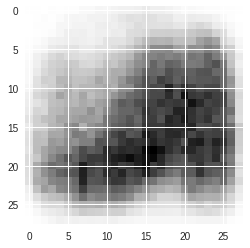

Batch:  105 Cost:  0.35628509521484375


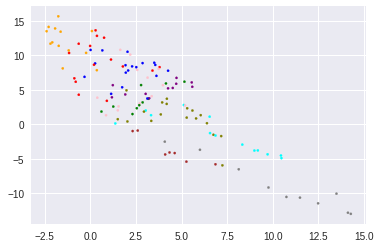

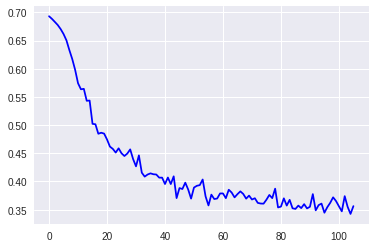

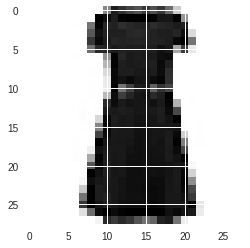

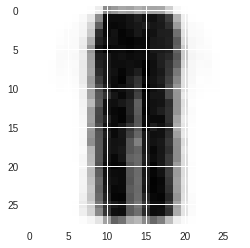

Batch:  106 Cost:  0.35547858476638794


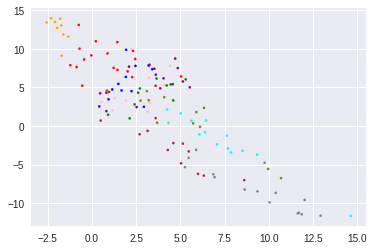

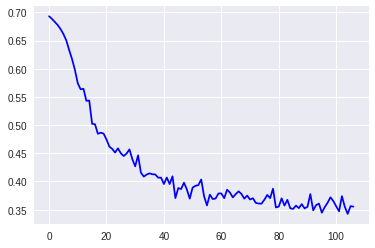

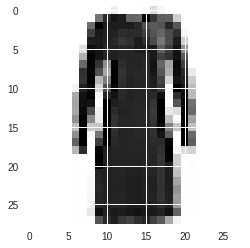

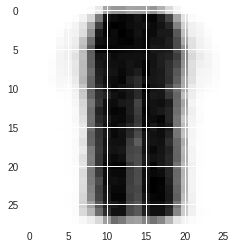

Batch:  107 Cost:  0.3510379493236542


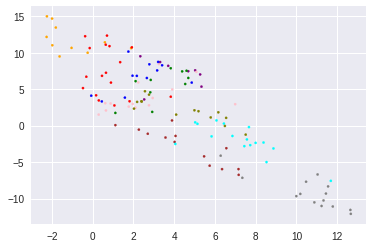

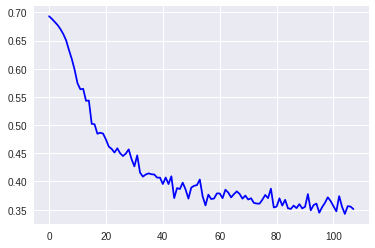

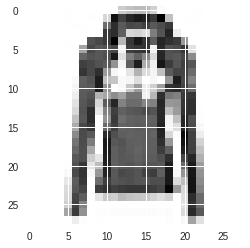

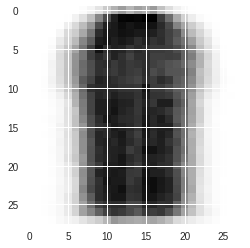

Batch:  108 Cost:  0.3553488254547119


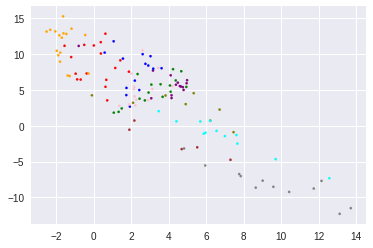

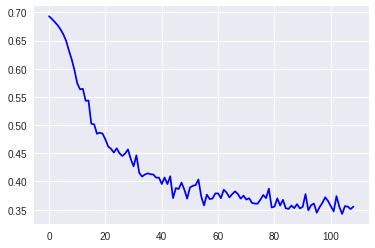

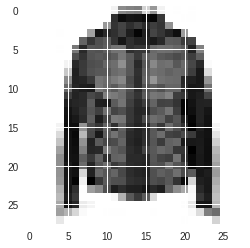

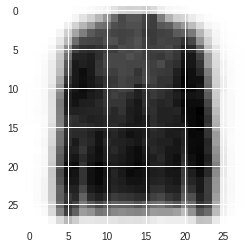

Batch:  109 Cost:  0.3662407398223877


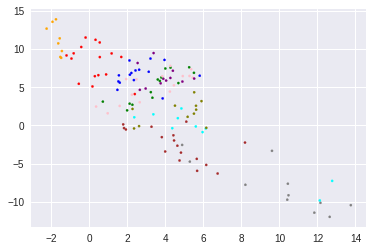

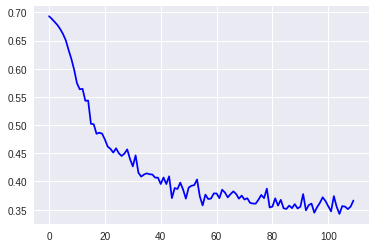

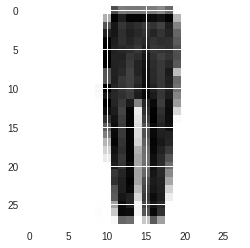

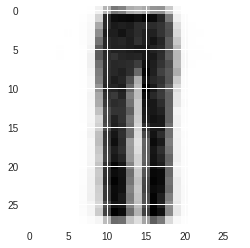

Batch:  110 Cost:  0.3548007905483246


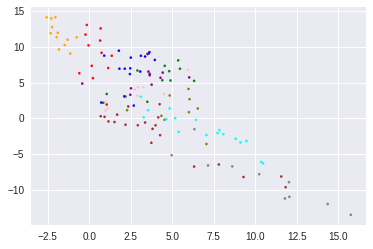

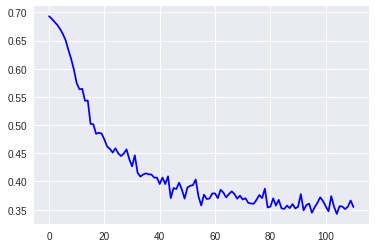

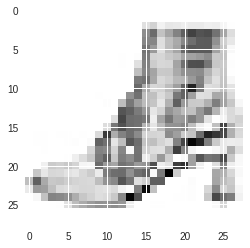

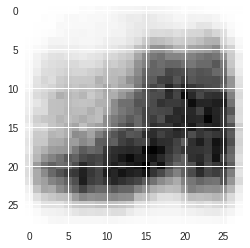

Batch:  111 Cost:  0.34827929735183716


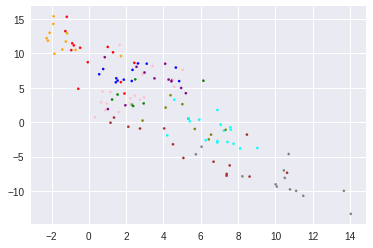

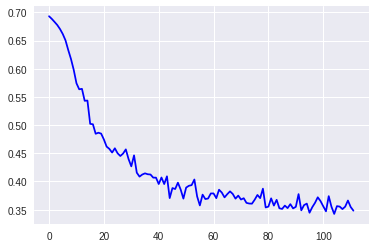

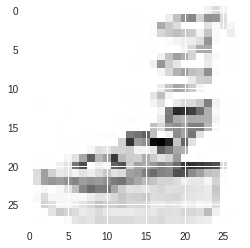

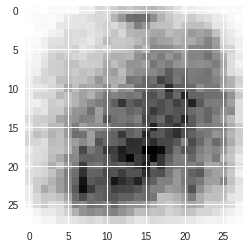

Batch:  112 Cost:  0.34576576948165894


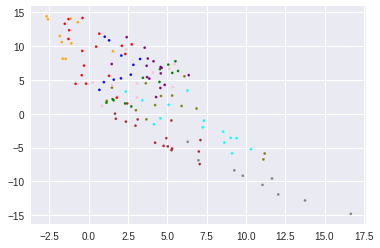

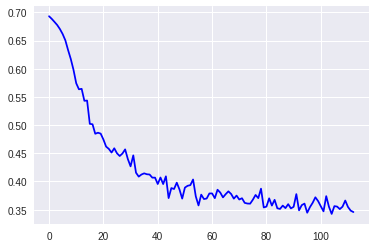

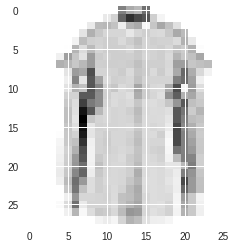

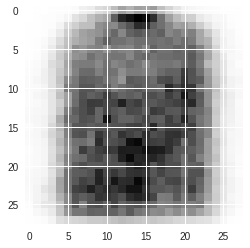

Batch:  113 Cost:  0.34615883231163025


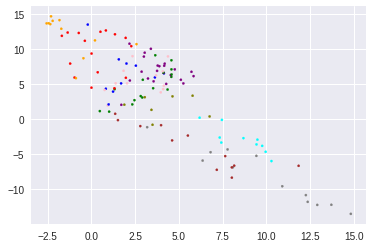

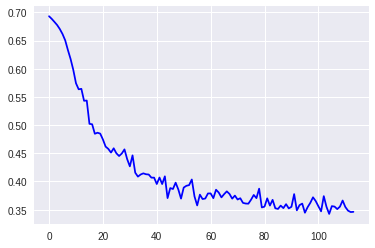

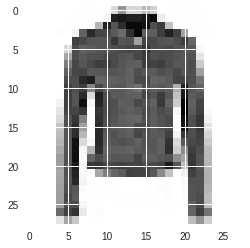

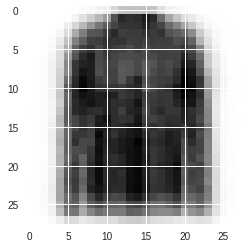

Batch:  114 Cost:  0.3626326024532318


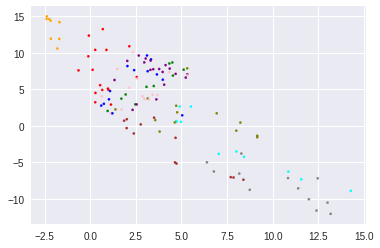

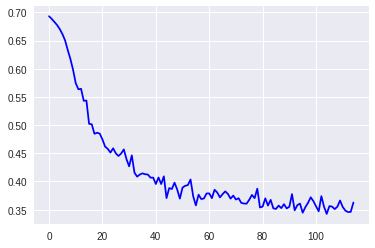

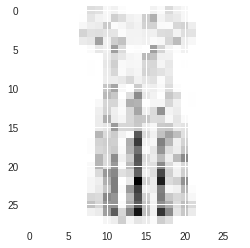

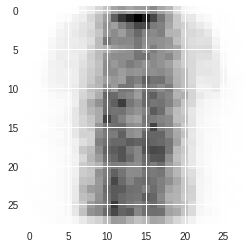

Batch:  115 Cost:  0.35049378871917725


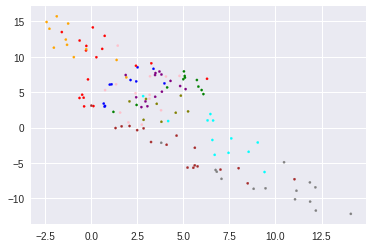

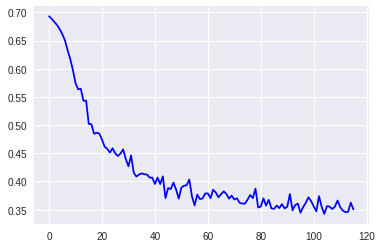

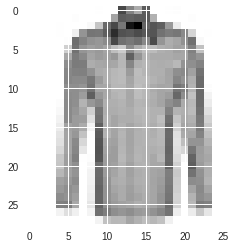

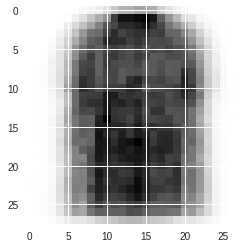

Batch:  116 Cost:  0.3594198524951935


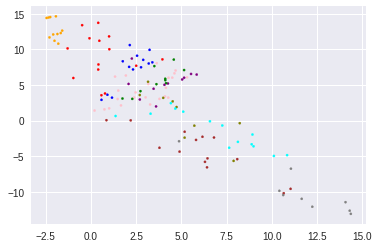

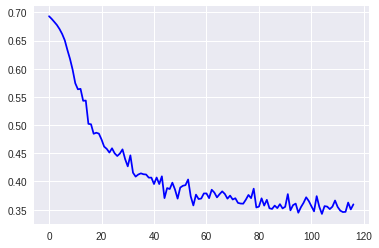

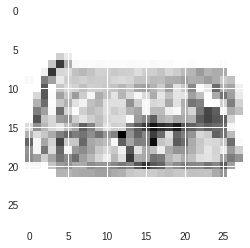

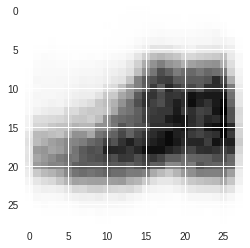

Batch:  117 Cost:  0.3768603801727295


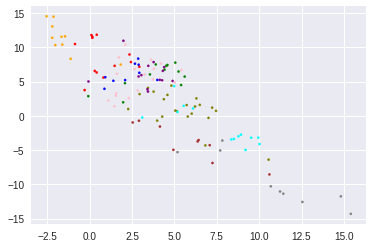

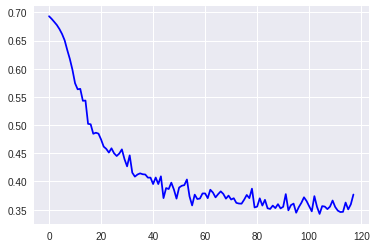

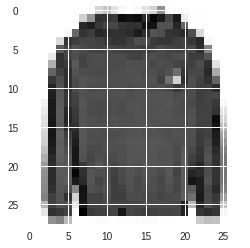

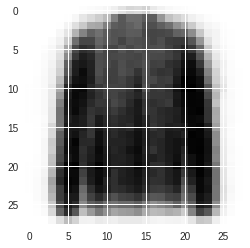

Batch:  118 Cost:  0.35517618060112


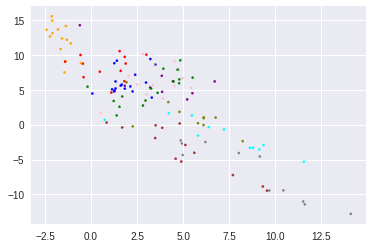

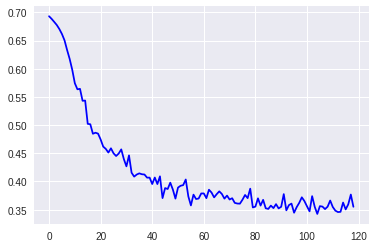

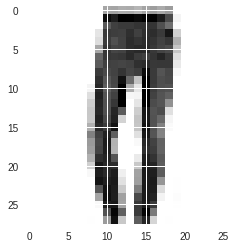

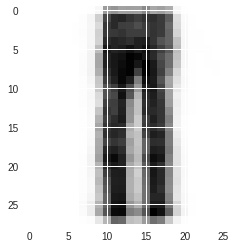

Batch:  119 Cost:  0.3340068757534027


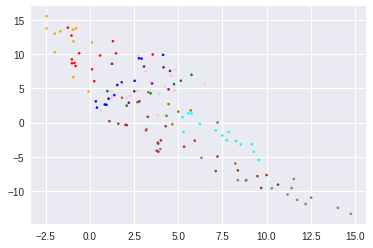

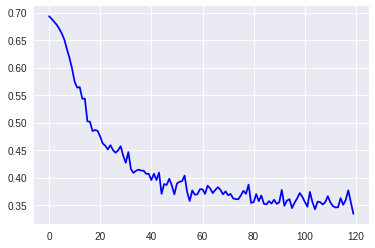

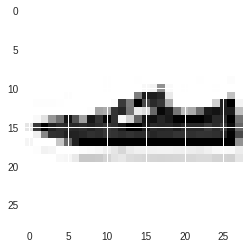

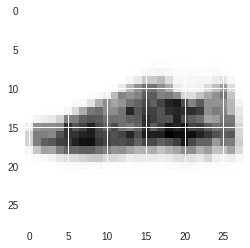

Batch:  120 Cost:  0.3603336811065674


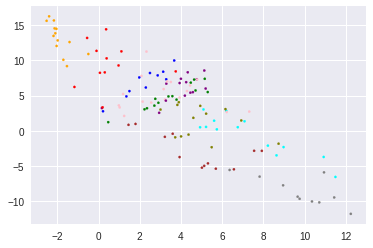

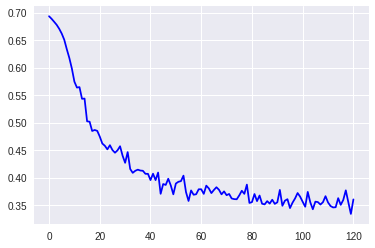

Batch:  121 Cost:  0.355246365070343


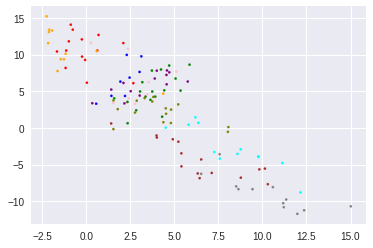

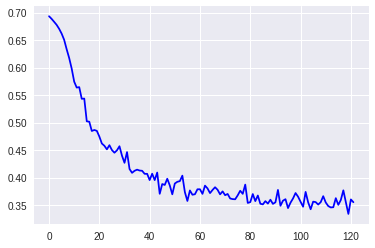

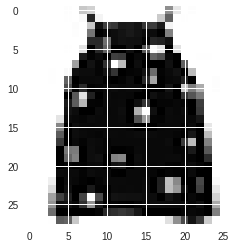

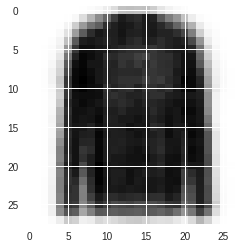

Batch:  122 Cost:  0.3636181354522705


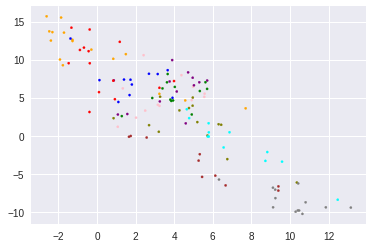

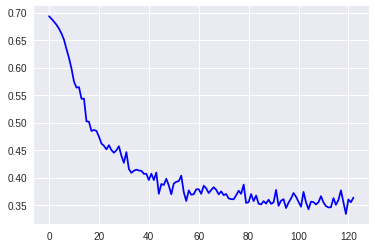

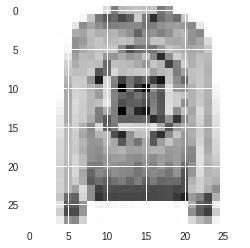

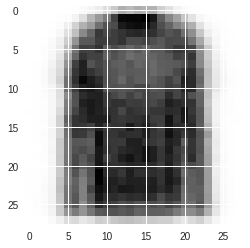

Batch:  123 Cost:  0.3644939064979553


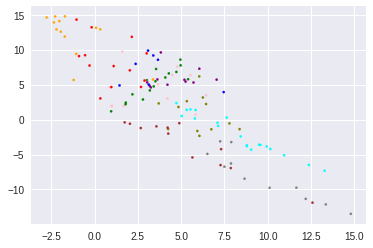

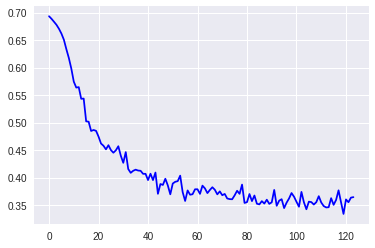

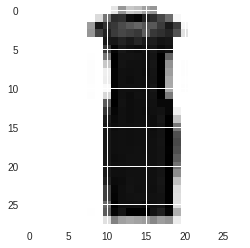

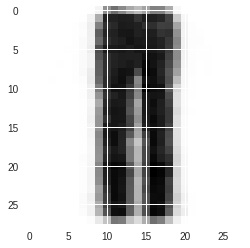

Batch:  124 Cost:  0.3496011197566986


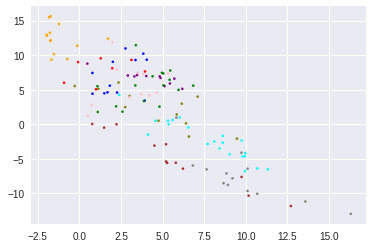

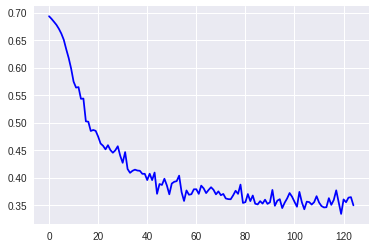

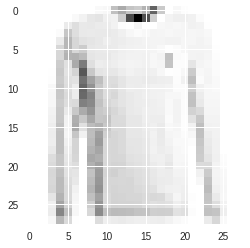

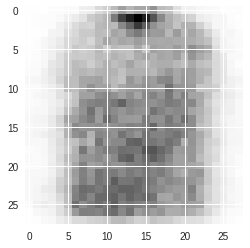

Batch:  125 Cost:  0.36305302381515503


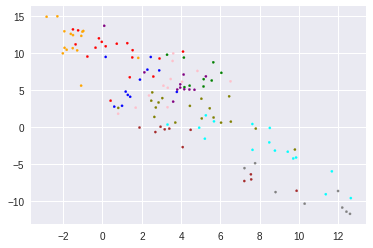

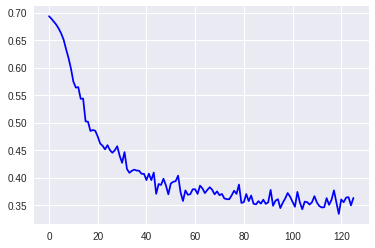

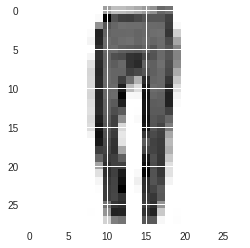

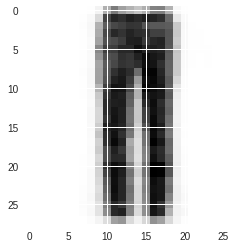

Batch:  126 Cost:  0.33654850721359253


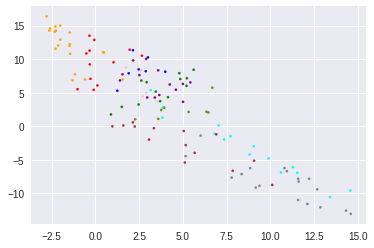

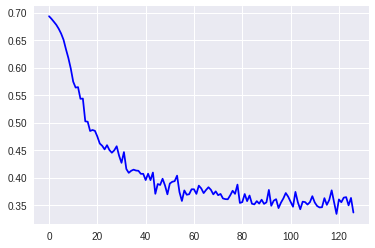

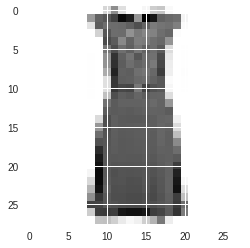

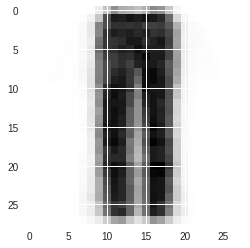

Batch:  127 Cost:  0.3627622425556183


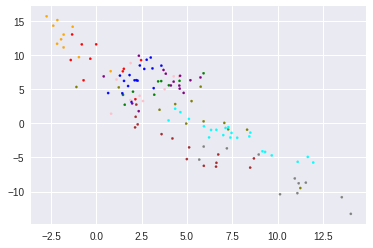

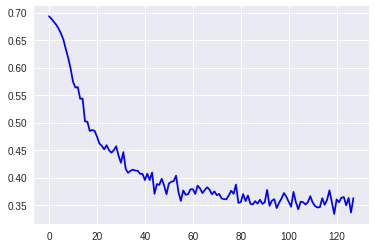

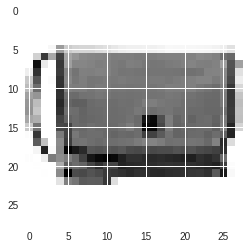

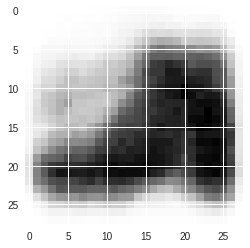

Batch:  128 Cost:  0.35677453875541687


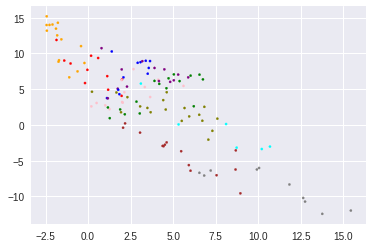

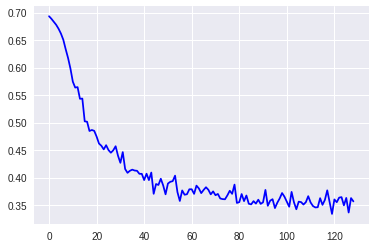

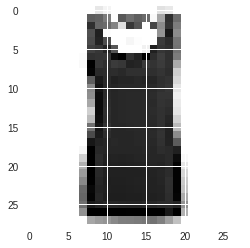

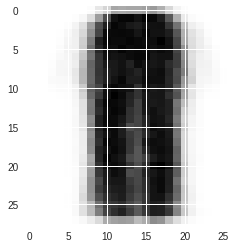

Batch:  129 Cost:  0.37470144033432007


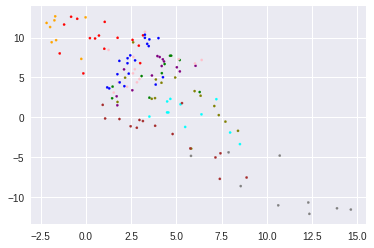

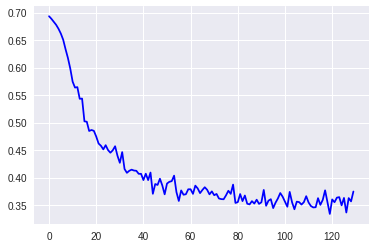

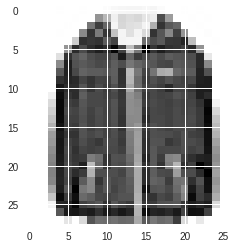

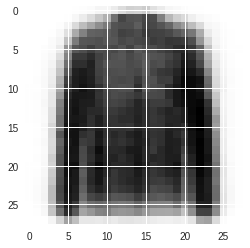

Batch:  130 Cost:  0.3659213185310364


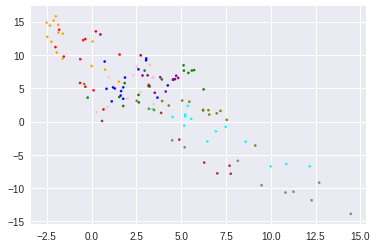

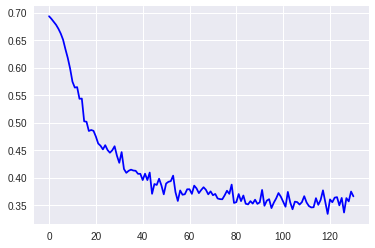

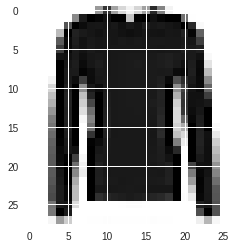

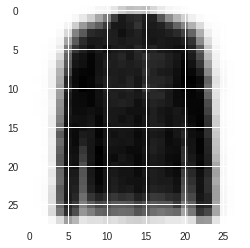

Batch:  131 Cost:  0.36555904150009155


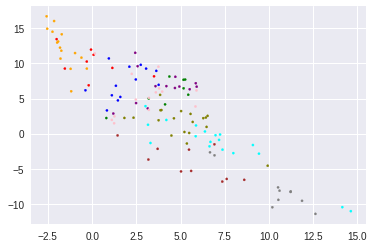

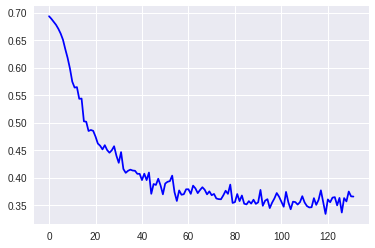

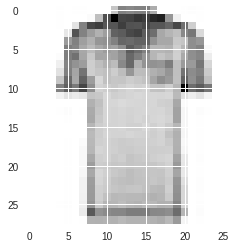

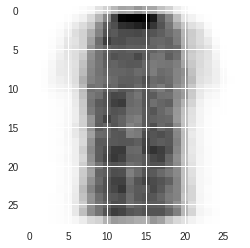

Batch:  132 Cost:  0.3473075032234192


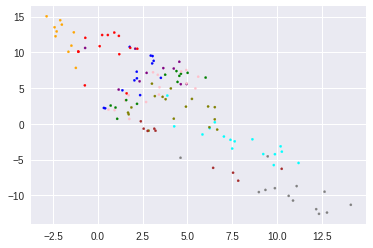

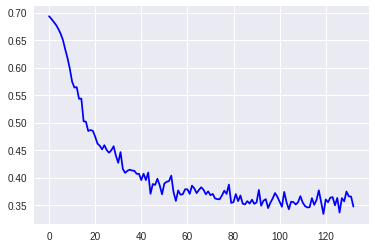

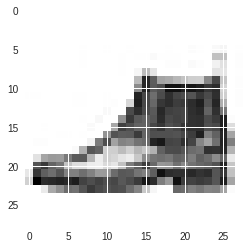

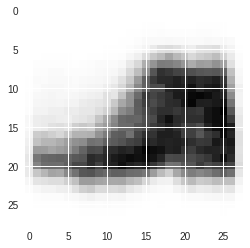

Batch:  133 Cost:  0.3318280875682831


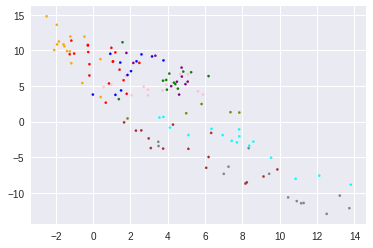

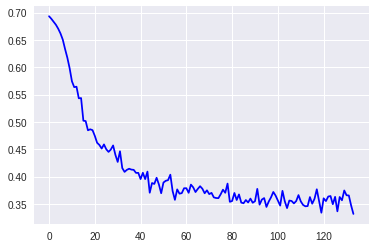

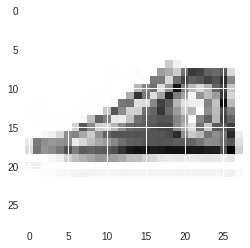

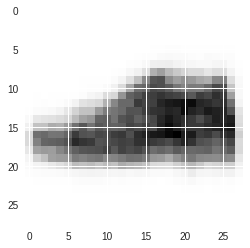

Batch:  134 Cost:  0.35934609174728394


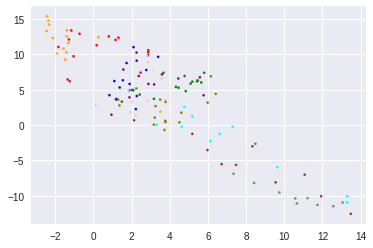

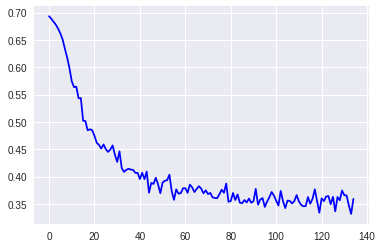

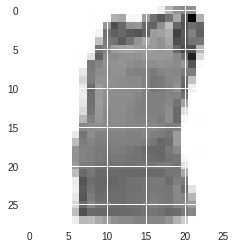

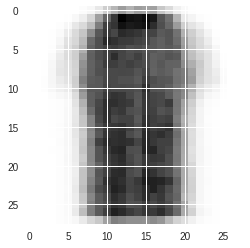

Batch:  135 Cost:  0.36088982224464417


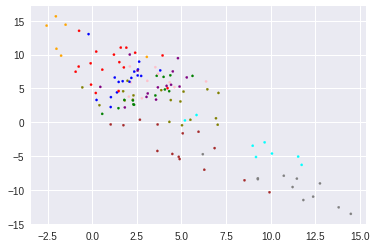

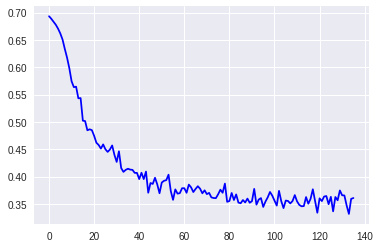

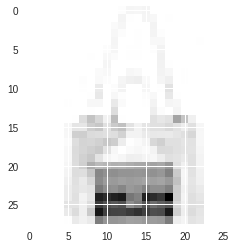

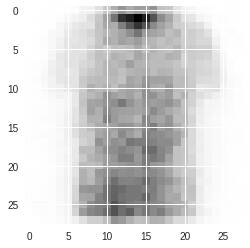

Batch:  136 Cost:  0.3458353579044342


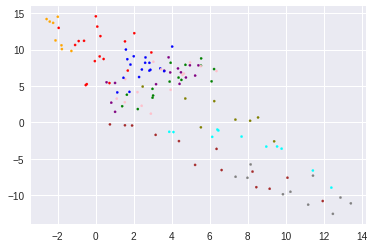

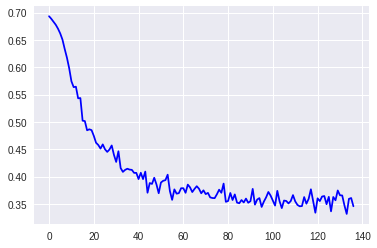

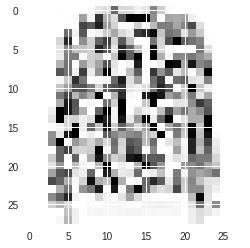

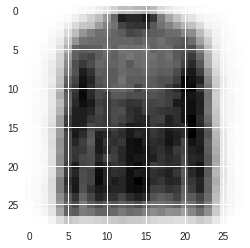

Batch:  137 Cost:  0.3541061580181122


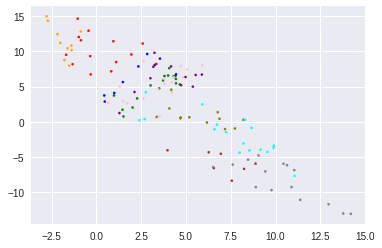

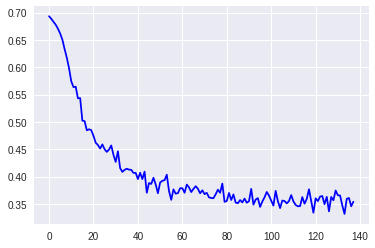

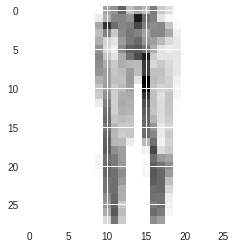

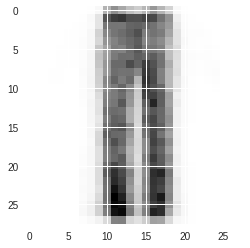

Batch:  138 Cost:  0.34820401668548584


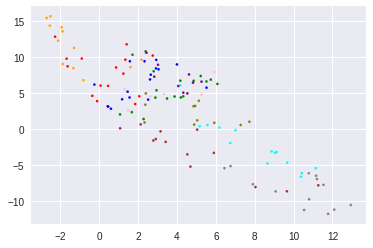

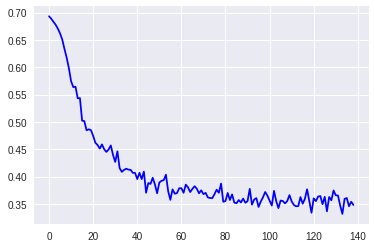

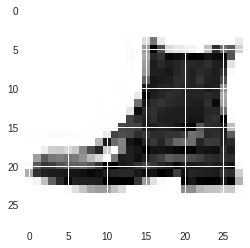

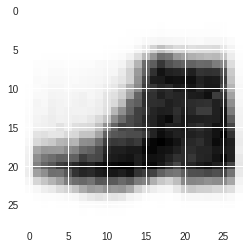

Batch:  139 Cost:  0.3426138460636139


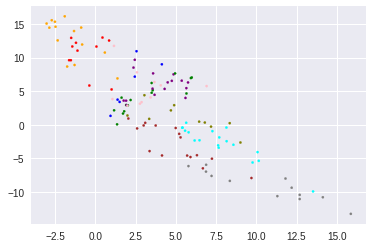

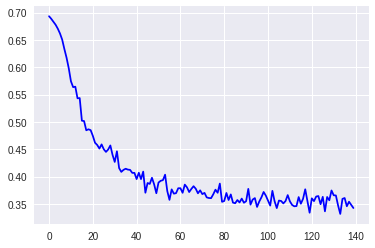

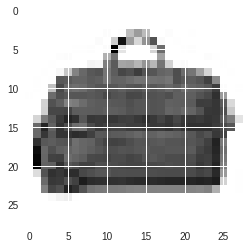

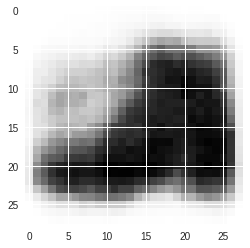

Batch:  140 Cost:  0.35463884472846985


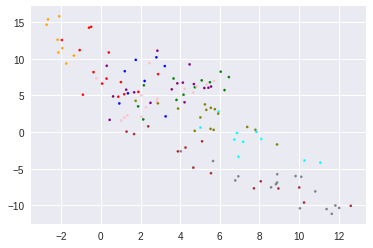

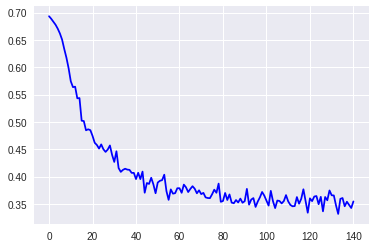

Batch:  141 Cost:  0.3625425100326538


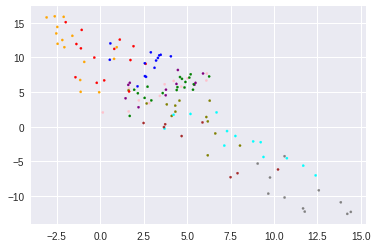

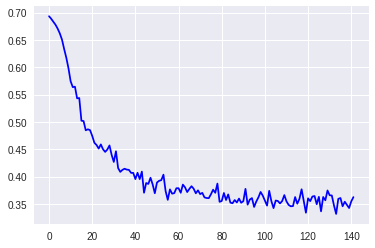

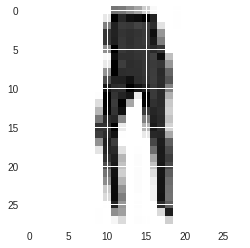

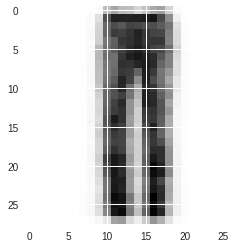

Batch:  142 Cost:  0.33996278047561646


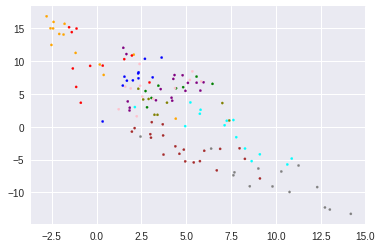

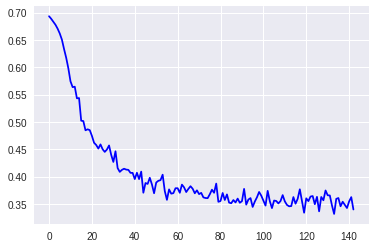

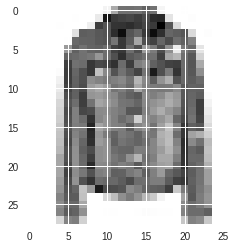

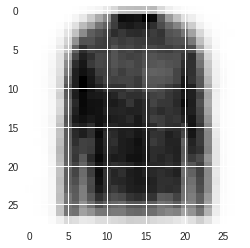

Batch:  143 Cost:  0.343282550573349


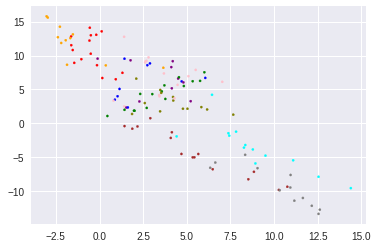

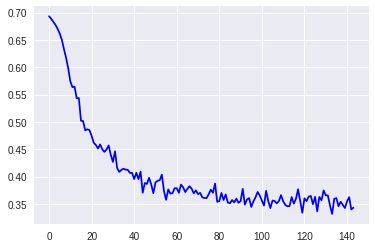

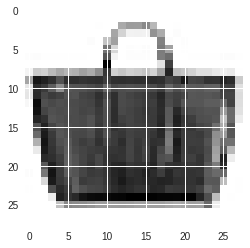

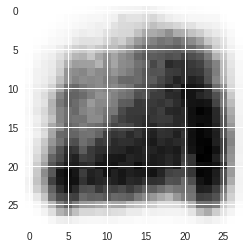

Batch:  144 Cost:  0.3555202782154083


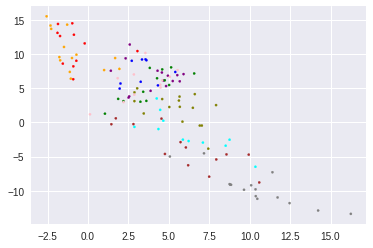

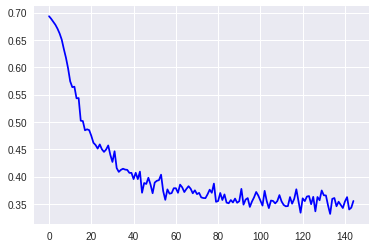

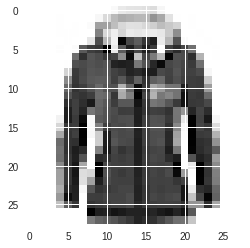

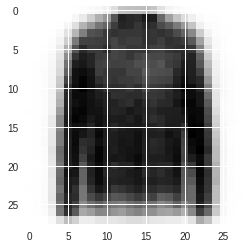

Batch:  145 Cost:  0.3465396463871002


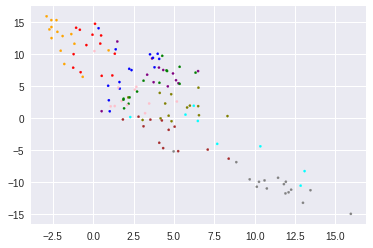

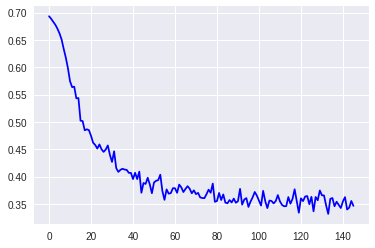

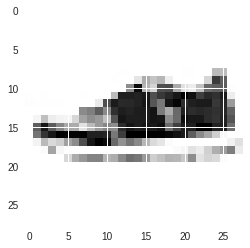

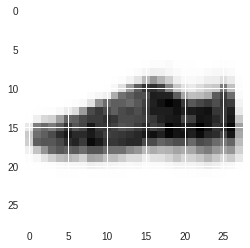

Batch:  146 Cost:  0.3484428822994232


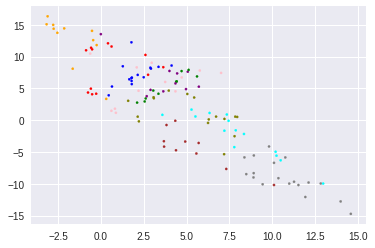

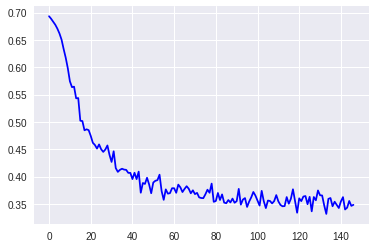

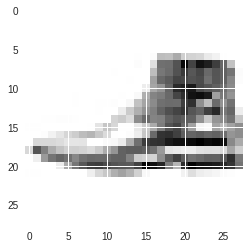

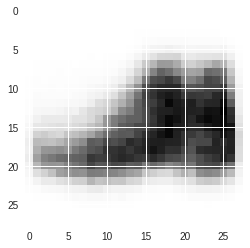

Batch:  147 Cost:  0.33405184745788574


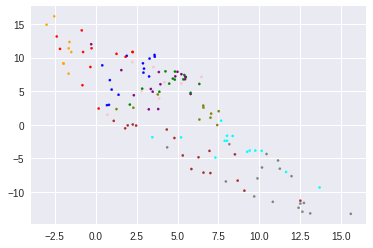

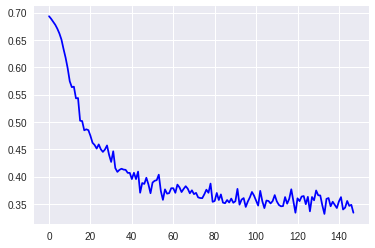

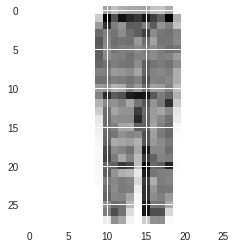

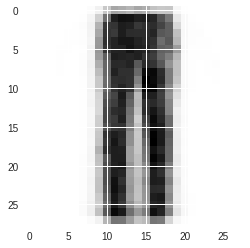

Batch:  148 Cost:  0.34793829917907715


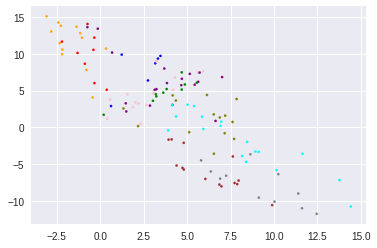

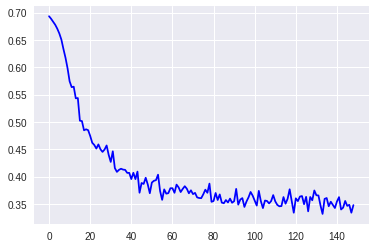

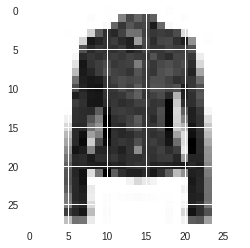

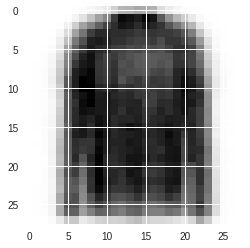

Batch:  149 Cost:  0.3406944274902344


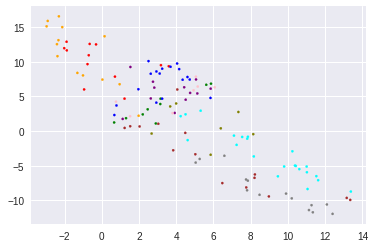

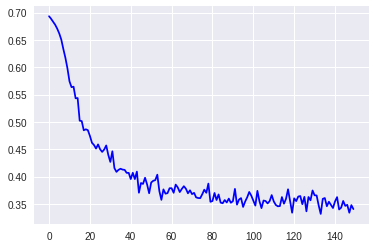

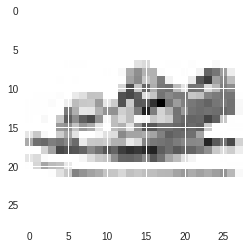

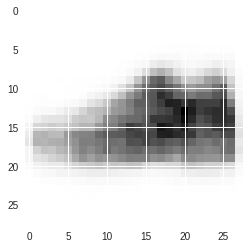

Batch:  150 Cost:  0.3645242154598236


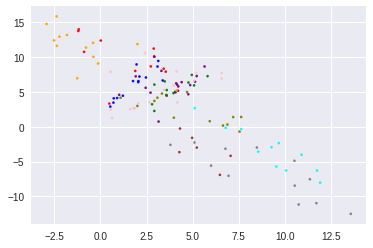

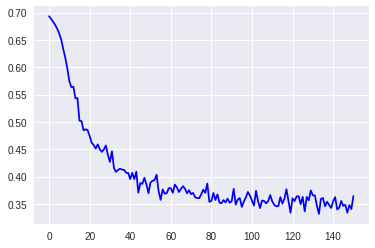

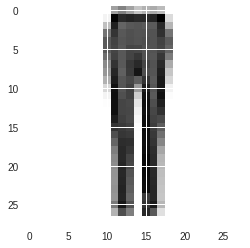

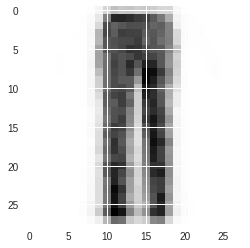

Batch:  151 Cost:  0.34922242164611816


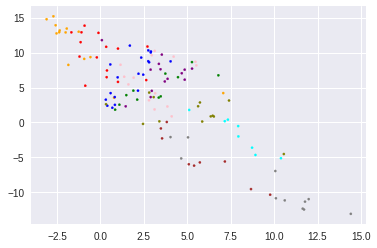

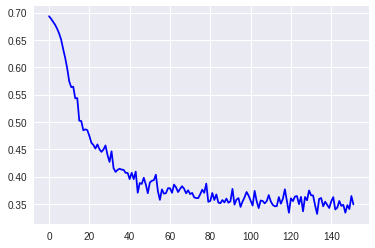

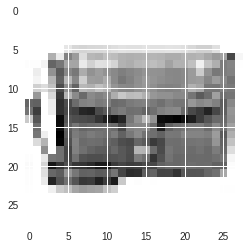

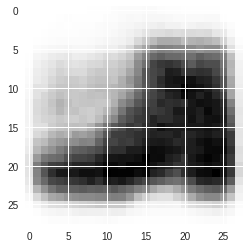

Batch:  152 Cost:  0.3457409143447876


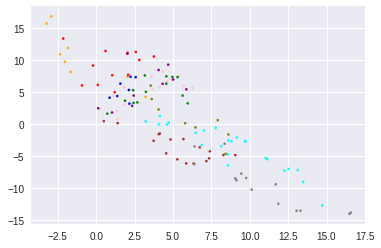

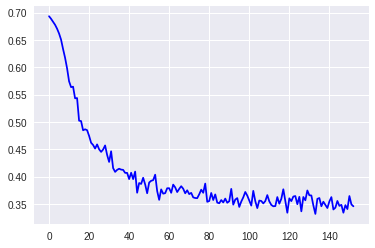

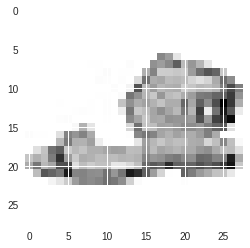

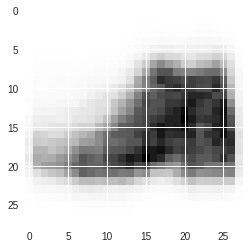

Batch:  153 Cost:  0.3301038444042206


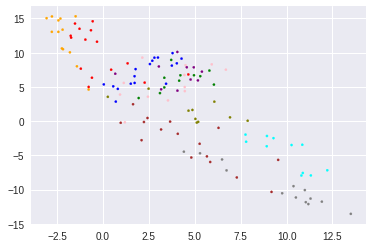

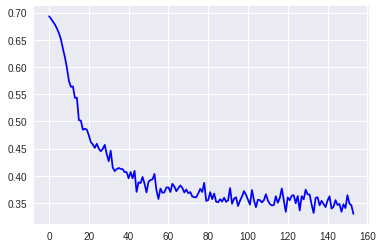

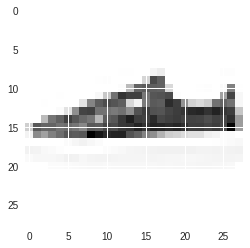

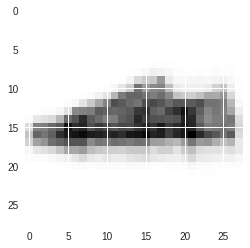

Batch:  154 Cost:  0.3379380702972412


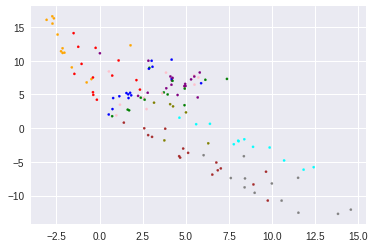

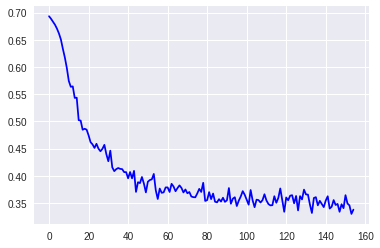

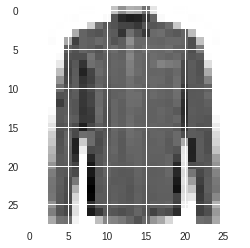

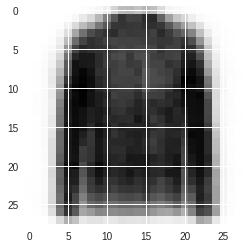

Batch:  155 Cost:  0.3421872854232788


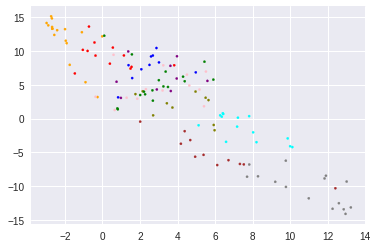

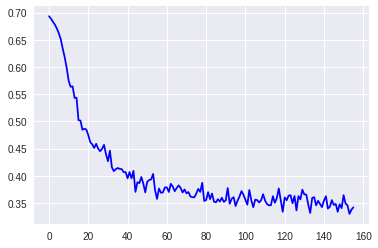

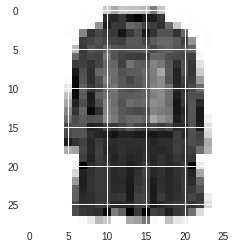

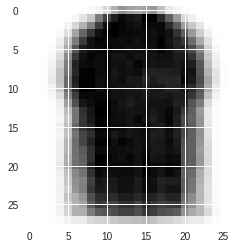

Batch:  156 Cost:  0.36712217330932617


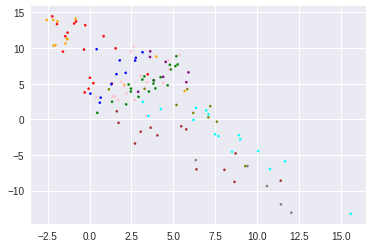

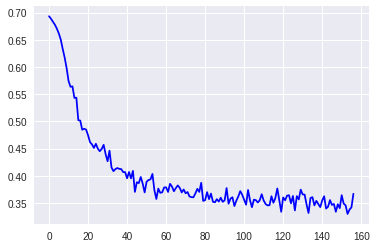

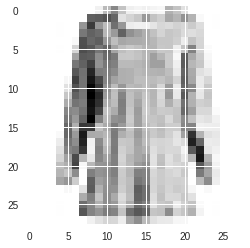

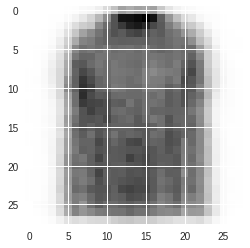

Batch:  157 Cost:  0.34650418162345886


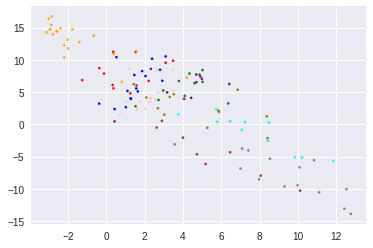

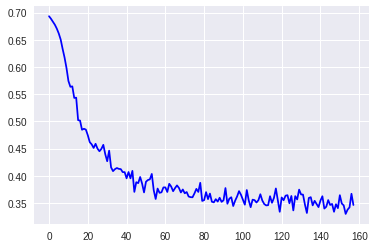

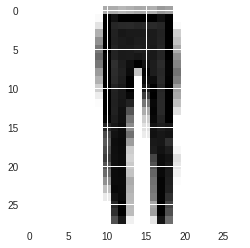

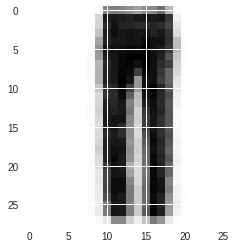

Batch:  158 Cost:  0.3601318299770355


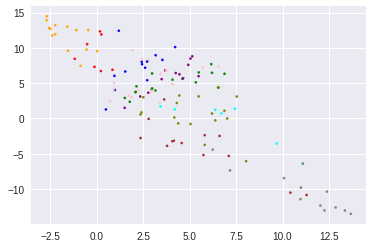

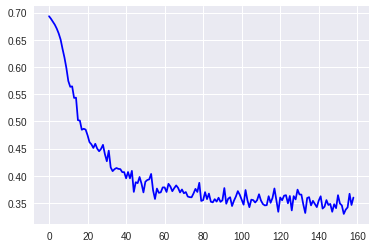

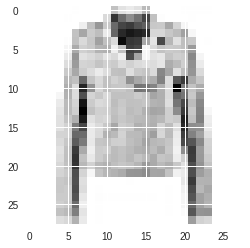

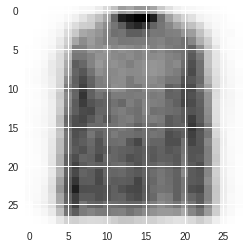

Batch:  159 Cost:  0.35234740376472473


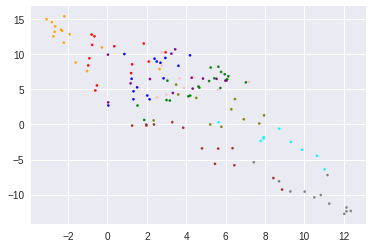

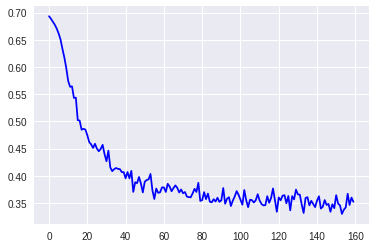

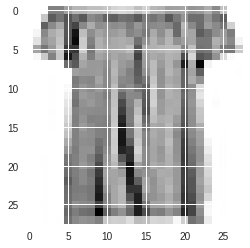

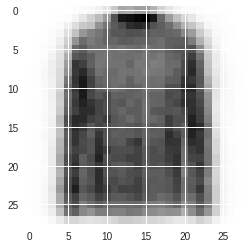

Batch:  160 Cost:  0.3609701991081238


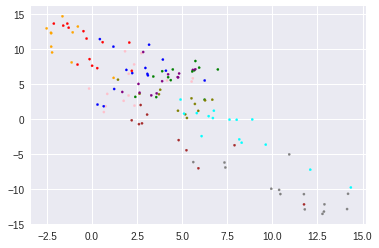

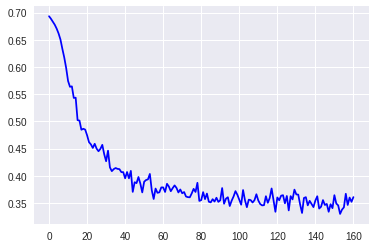

Batch:  161 Cost:  0.36203762888908386


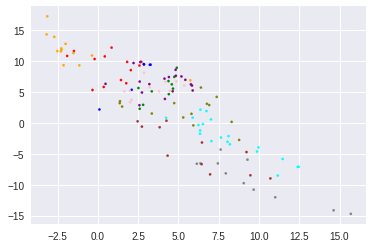

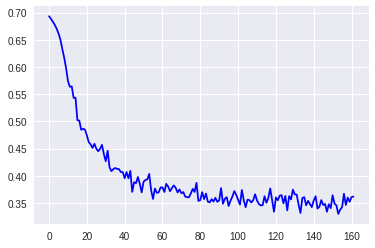

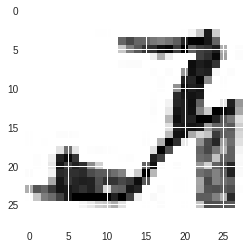

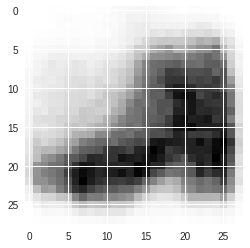

Batch:  162 Cost:  0.3397054076194763


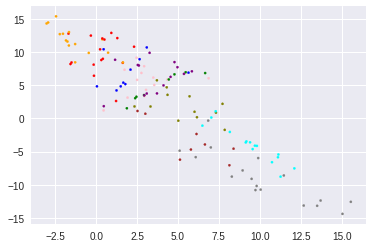

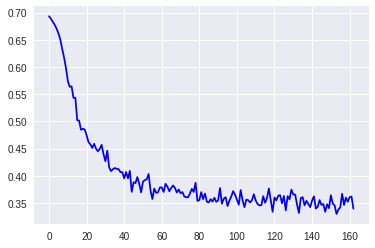

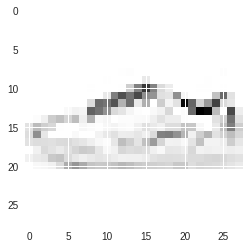

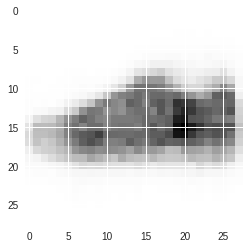

Batch:  163 Cost:  0.33474200963974


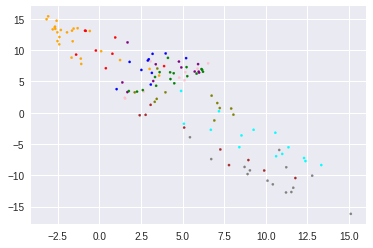

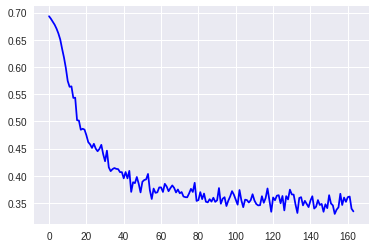

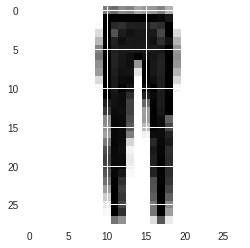

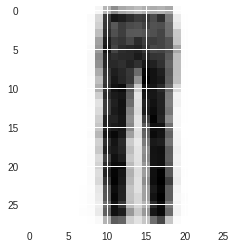

Batch:  164 Cost:  0.34893083572387695


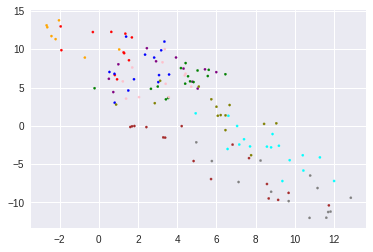

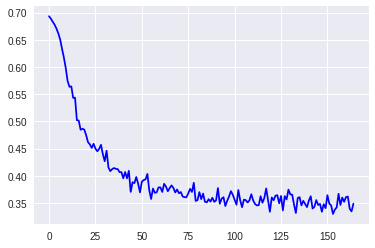

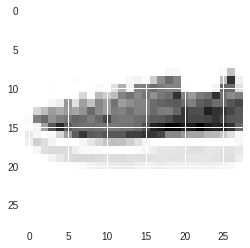

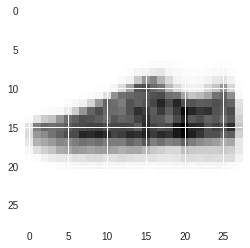

Batch:  165 Cost:  0.3407129943370819


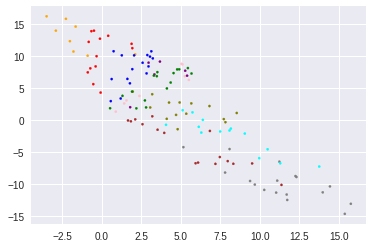

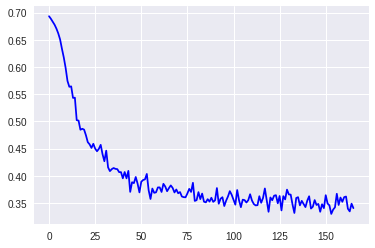

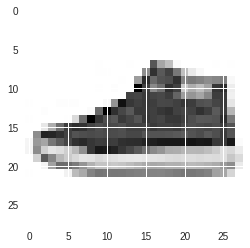

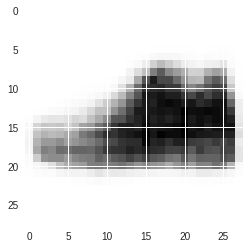

Batch:  166 Cost:  0.3574084937572479


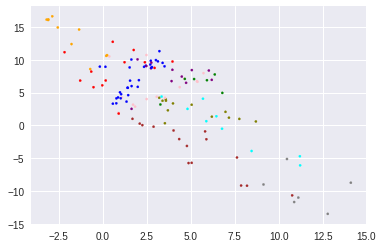

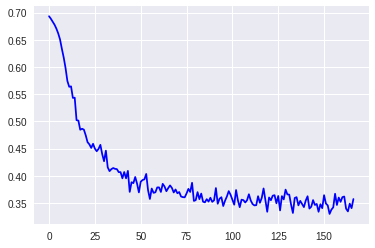

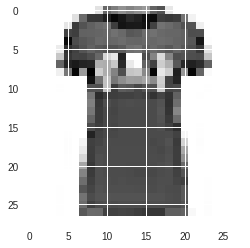

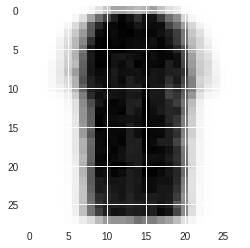

Batch:  167 Cost:  0.3591228723526001


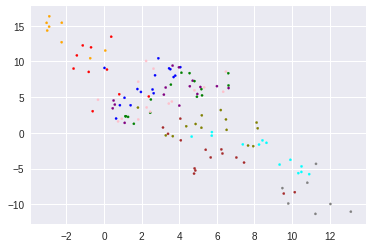

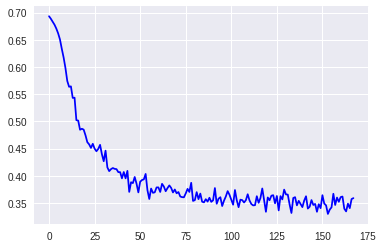

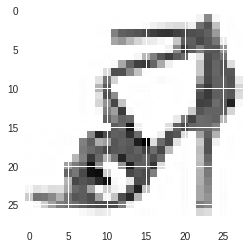

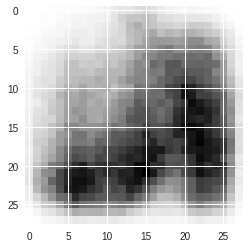

Batch:  168 Cost:  0.3457708954811096


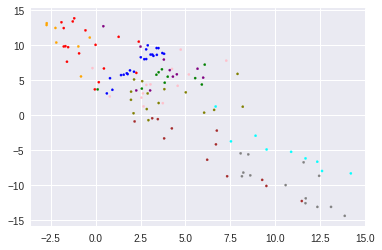

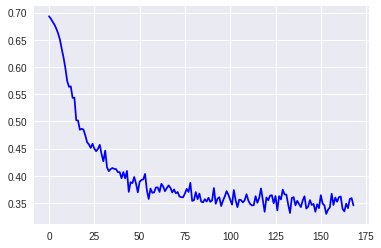

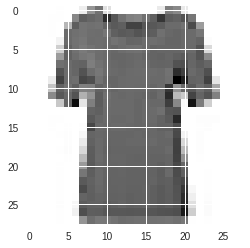

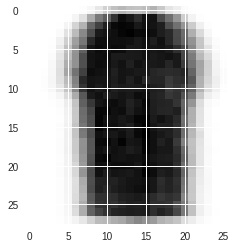

Batch:  169 Cost:  0.3545345366001129


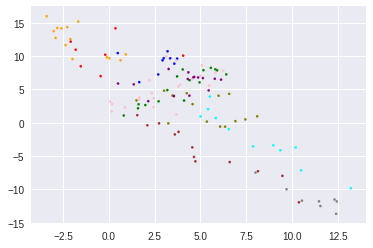

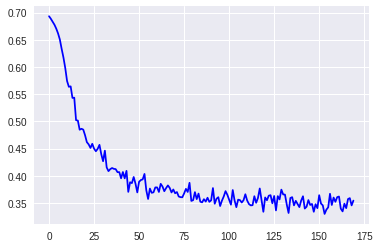

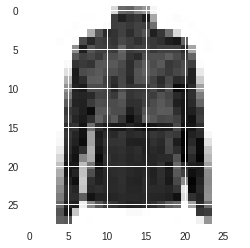

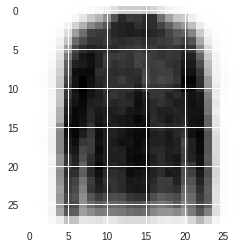

Batch:  170 Cost:  0.3549005091190338


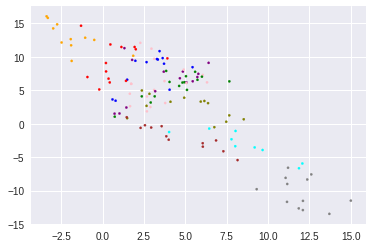

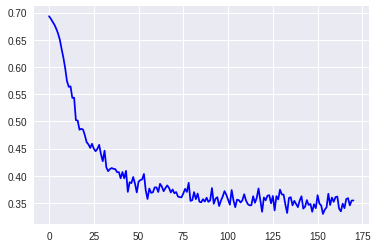

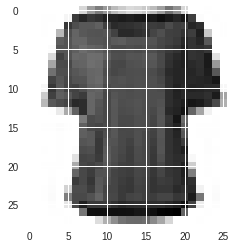

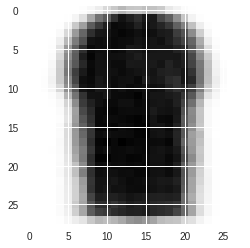

Batch:  171 Cost:  0.3404516875743866


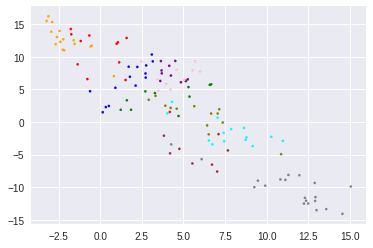

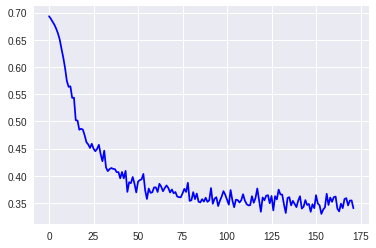

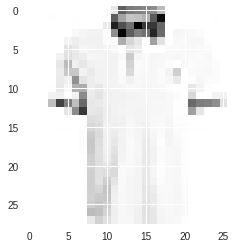

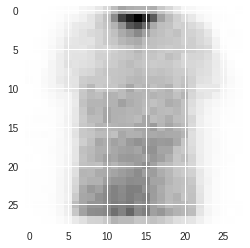

Batch:  172 Cost:  0.37617364525794983


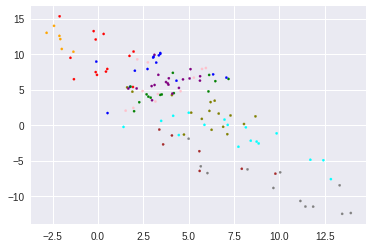

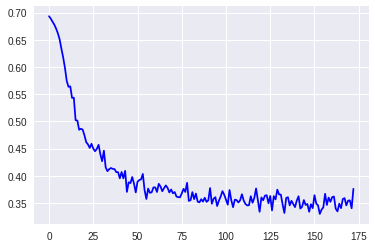

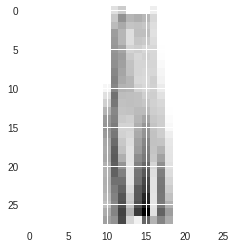

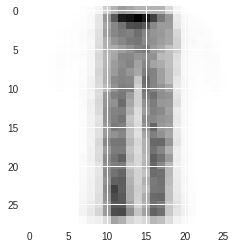

Batch:  173 Cost:  0.32938864827156067


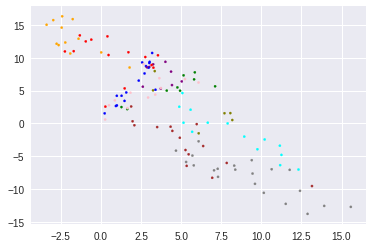

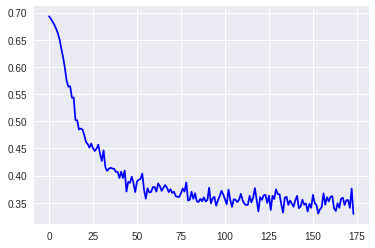

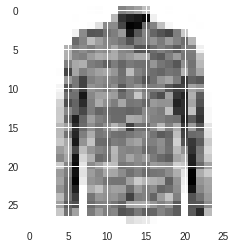

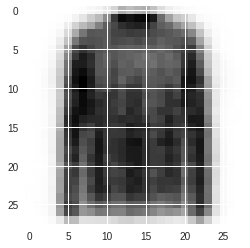

Batch:  174 Cost:  0.34902170300483704


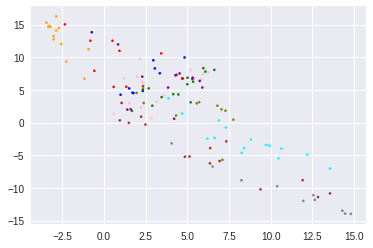

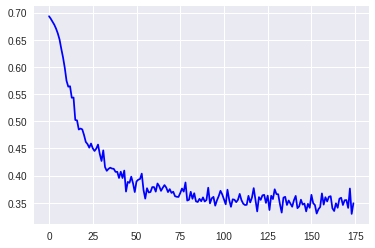

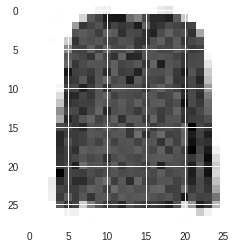

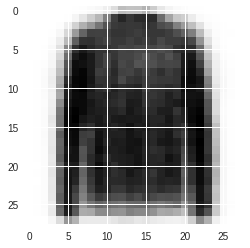

Batch:  175 Cost:  0.3540882170200348


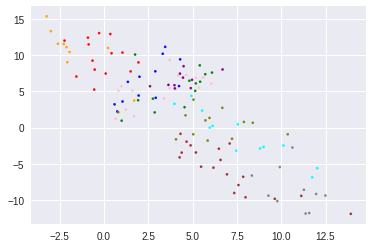

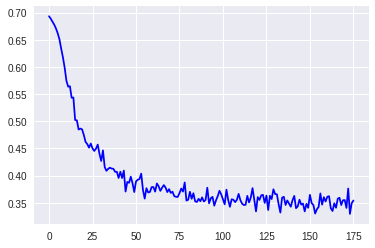

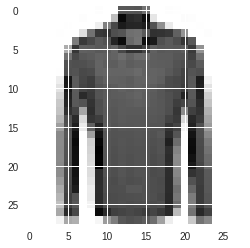

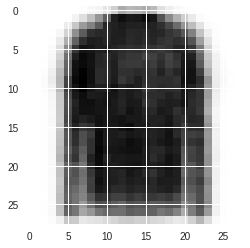

Batch:  176 Cost:  0.3427043855190277


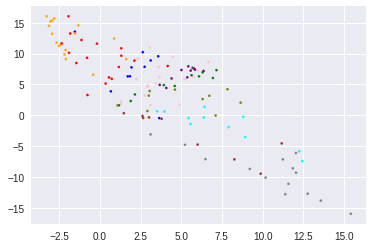

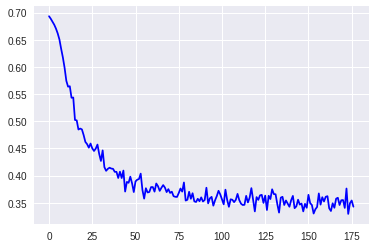

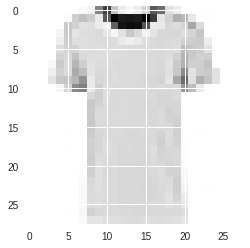

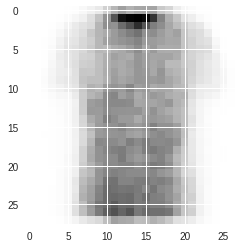

Batch:  177 Cost:  0.3546912670135498


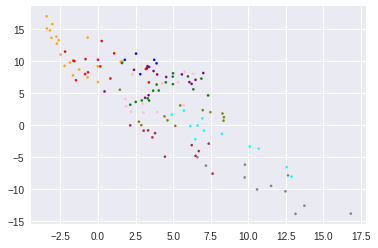

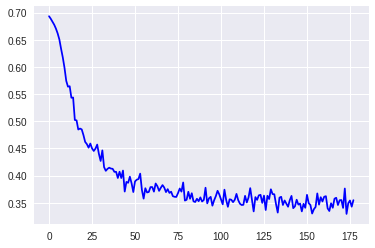

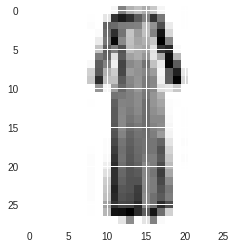

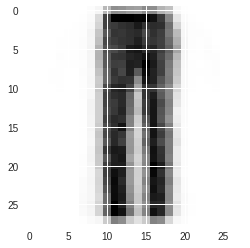

Batch:  178 Cost:  0.35167568922042847


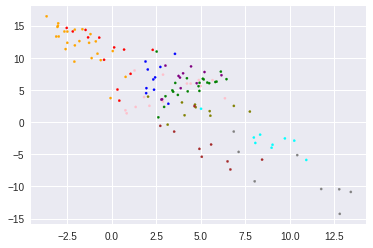

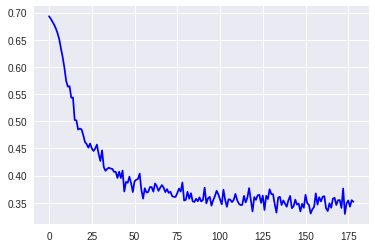

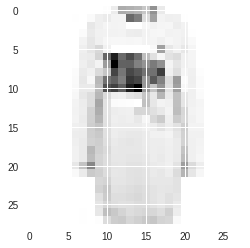

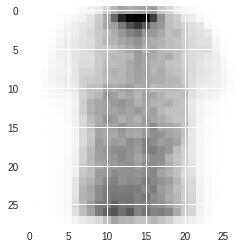

Batch:  179 Cost:  0.3454115092754364


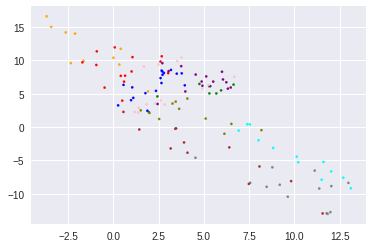

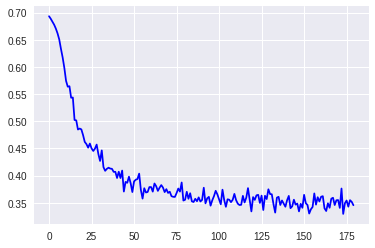

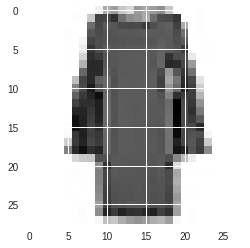

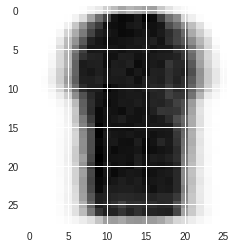

Batch:  180 Cost:  0.35446611046791077


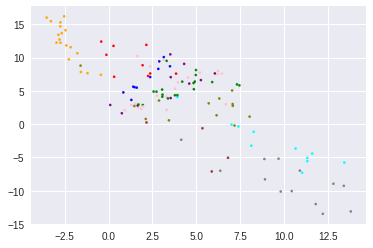

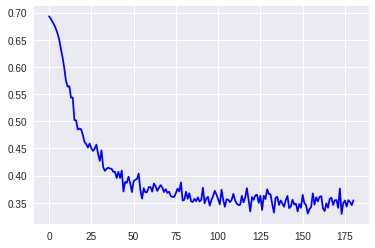

Batch:  181 Cost:  0.3705229163169861


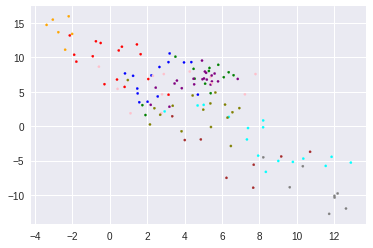

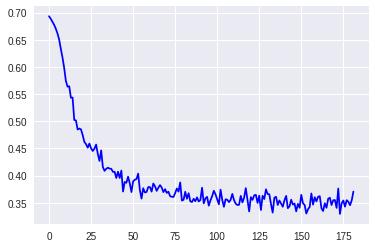

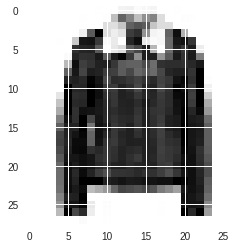

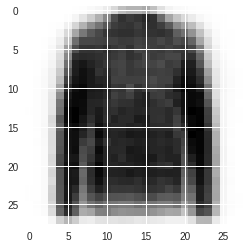

Batch:  182 Cost:  0.3562656342983246


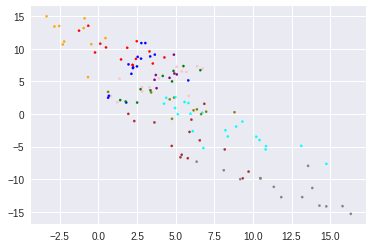

Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 22.2K of output have been discarded. 

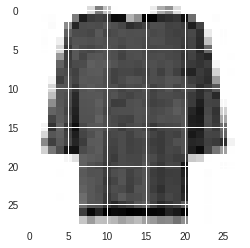

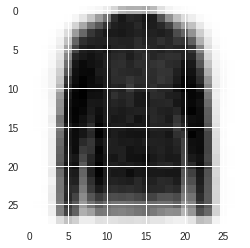

Batch:  183 Cost:  0.3674519956111908


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 56.3K of output have been discarded. 

Batch:  184 Cost:  0.3465379476547241


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 55.4K of output have been discarded. 

Batch:  185 Cost:  0.34400179982185364


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 55.5K of output have been discarded. 

Batch:  186 Cost:  0.3409288823604584


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 56.8K of output have been discarded. 

Batch:  187 Cost:  0.3242335319519043


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 55.7K of output have been discarded. 

Batch:  188 Cost:  0.3339662253856659


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 53.5K of output have been discarded. 

Batch:  189 Cost:  0.35506296157836914


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 53.5K of output have been discarded. 

Batch:  190 Cost:  0.33888882398605347


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 54.1K of output have been discarded. 

Batch:  191 Cost:  0.3490145802497864


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 55.7K of output have been discarded. 

Batch:  192 Cost:  0.34259602427482605


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 56.1K of output have been discarded. 

Batch:  193 Cost:  0.3503100275993347


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 54.9K of output have been discarded. 

Batch:  194 Cost:  0.3346986174583435


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 369.9K of output have been discarded. 

In [0]:
myautoencoder = Autoencoder()
optimiser = torch.optim.Adam(myautoencoder.parameters(), lr=lr)

def train(epochs):
  myautoencoder.train()
  costs = []
  for e in range(epochs):
    for batch_index, (x,y) in enumerate(training_samples):
      x = Variable(x)
      x_pred, z = myautoencoder(x)
      
      cost = loss(x_pred, x)
      costs.append(cost.data)
      cost.backward()
      optimiser.step()
      optimiser.zero_grad()
      
      print('Batch: ', batch_index, 'Cost: ', cost.data[0])
      
      z = np.array(z.data)
      
      colordict = {0:'blue', 1:'orange', 2:'green', 3:'red', 4:'purple', 5:'brown', 6:'pink', 7:'gray', 8:'olive', 9:'cyan'}
      colorlist = [colordict[i] for i in y]
      
      plt.figure()
      plt.scatter(z[:,0], z[:,1], c=colorlist, s=5)
      plt.show()
      
      plt.figure()
      plt.plot(costs, 'b')
      plt.show()
      
      if batch_index ==200:
        break
        
      if batch_index % 20:
        x = x.view(-1, 28, 28)
        x_pred = x_pred.view(-1,28,28)
        
        plt.imshow(x.data[0])
        plt.show()
        plt.imshow(x_pred.data[0])
        plt.show()
        
train(epochs)

In [0]:
class VAE(torch.nn.Module):
  def __init__(self):
    super().__init__()
    
    #To centre it around mean
    self.to_mu1 = torch.nn.Linear(784, 256)
    self.to_mu2 = torch.nn.Linear(256, 64)
    self.to_mu3 = torch.nn.Linear(64, latent_dim)
    
    #To log(variance)
    self.to_logvar1 = torch.nn.Linear(784, 256)
    self.to_logvar2 = torch.nn.Linear(256, 64)
    self.to_logvar3 = torch.nn.Linear(64, latent_dim)
    
    #decoder
    self.d1 = torch.nn.Linear(latent_dim, 64)
    self.d2 = torch.nn.Linear(64, 256)
    self.d3 = torch.nn.Linear(256, 784)
    
    
  def encode(self, x):
    x = x.view(-1, 784)
    
    mu = F.relu(self.to_mu1(x))
    mu = F.relu(self.to_mu2(mu))
    mu = self.to_mu3(mu)
    
    logvar = F.relu(self.to_logvar1(x))
    logvar = F.relu(self.to_logvar2(logvar))
    logvar = self.to_logvar3(logvar)
    
    return mu, logvar
  
  def reparameterize(self, mu, logvar):
    epsilon = Variable(torch.Tensor(np.random.randn(batch_size, latent_dim)))
    z = mu + epsilon * (0.5*logvar).exp() #Gives the standard deviation rather than log(var)
    return z
  
  def decode(self, z):
    x_pred = F.relu(self.d1(z))
    x_pred = F.relu(self.d2(x_pred))
    x_pred = F.sigmoid(self.d3(x_pred))
    return x_pred
  
  def forward(self, x):
    mu, logvar = self.encode(x)
    z = self.reparameterize(mu, logvar)
    x_pred = self.decode(z)
    return x_pred, z, mu, logvar
  

def VAEloss(x_hat, x, mu, logvar):
  reconstruction_loss = F.binary_cross_entropy(x_hat, x.view(-1, 784), size_average=False) #Size_average means when KL is calculated thats over the whole batch so dont want to average that
  KL_divergence = -0.5*torch.sum(1 + logvar - mu**2 - logvar.exp())
  return reconstruction_loss + KL_divergence

myVAE = VAE()
optimiser = torch.optim.Adam(myVAE.parameters(), lr=lr)

def trainVAE():
  myVAE.train()
  costs = []
  for epoch in range(epochs):
    for batch_index, (x,y) in enumerate(training_samples):
      x = Variable(x)
      x_pred, x, mu, logvar = myVAE(x)
      
      cost = VAEloss(x_pred, x, mu, logvar)
      costs.append(cost.data)
      cost.backwards()
      optimiser.step()
      optimiser.zero_grad()
      
      print('Epoch: ', epoch, 'Batch: ', batch_index, 'Cost: ', cost.data[0])
      
      z = np.array(z.data)
      #print(z.shape)
      colordict = {0:'blue', 1:'orange', 2:'green', 3:'red', 4:'purple', 5:'brown', 6:'pink', 7:'gray', 8:'olive', 9:'cyan'}
      colorlist = [colordict[i] for i in y]

      plt.figure()
      plt.scatter(z[:, 0], z[:, 1], c=colorlist, s=5)
      plt.show()

      plt.figure()
      plt.plot(costs, 'b')
      plt.show()

      if batch_index == 200:
          break

      if batch_index % 20 == 0:
          x = x.view(-1, 28, 28)
          x_pred = x_pred.view(-1, 28, 28)



          plt.imshow(x.data[0])
          plt.show()
          plt.imshow(x_pred.data[0])
          plt.show()

trainVAE()
torch.save(myVAE, 'trained.pt')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1168: UserWarning: Using a target size (torch.Size([1, 256])) that is different to the input size (torch.Size([128, 784])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


ValueError: ignored